In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np

In [7]:
interaction_data = pd.read_csv('interactiondata-ef3a6513-9759-444d-8190-c34674e598ad.csv')
order_data = pd.read_csv('orderdata-12409682-6f38-4fcd-bd53-6af2fd8c91c7.csv')
user_data = pd.read_csv('userdata-b66177fb-1f96-4dfd-9b28-15b118ef4551.csv')

In [9]:
user_data

,userid,join_datetime,age,income,kids,teenagers,marital,education
0,dc9d5bd4-ec88-4546-b46c-fe9d6eaba691,2023-09-11 21:09:07,70,115443.0,0,0,divorced,bachelor
1,35821e5c-cc2a-425c-a270-5377de69177c,2023-12-25 14:09:54,71,107793.0,0,1,married,masters
2,d4810416-7e2a-4d1b-8440-30f39cd42aca,2022-11-14 12:31:05,13,25508.0,0,0,single,NaN
3,b56b1df3-8a67-4d61-82cf-dd9ed659bd63,2023-12-07 01:57:02,20,81139.0,0,0,single,bachelor
4,06583f0c-f0b2-4f50-add5-5f16238b33bb,2022-08-22 00:24:55,16,26121.0,0,0,single,masters
...,...,...,...,...,...,...,...,...
3400,8e05c000-746a-4aad-9e9f-4037998de319,2022-10-13 12:55:31,15,26219.0,0,0,single,masters
3401,0e4d7a7f-84a3-4341-9c5f-6eb400a5c010,2022-07-02 19:00:04,52,71801.0,1,1,married,bachelor
3402,f44e574b-ef4f-4cf4-9b7c-7bf165c8b990,2023-08-04 06:38:22,20,77725.0,0,0,single,masters
3403,0bc14633-7bcf-4ba6-be0f-8a85ab18c9e7,2024-01-27 13:56:22,62,109008.0,0,0,dating,phd


In [10]:
user_data.isnull().sum()

userid             0
join_datetime      0
age                0
income             0
kids               0
teenagers          0
marital            0
education        296
dtype: int64

296 пропусков по переменной education, чистим их

In [13]:
user_data = user_data.dropna(subset = ['education'])

{'whiskers': [<matplotlib.lines.Line2D at 0x10d6459d0>,
 'caps': [<matplotlib.lines.Line2D at 0x17f61a690>,
 'boxes': [<matplotlib.lines.Line2D at 0x17f958c10>],
 'medians': [<matplotlib.lines.Line2D at 0x17f606550>],
 'fliers': [<matplotlib.lines.Line2D at 0x17f646b90>],
 'means': []}

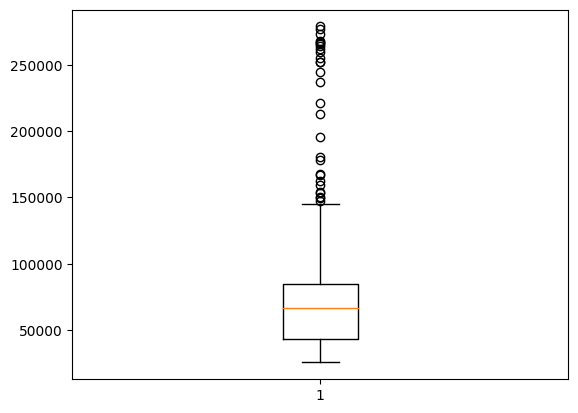

In [14]:
plt.boxplot(user_data['income'])

In [15]:
def remove_outliers(df, column):
    percentile25 = df[column].quantile(0.25)
    percentile75 = df[column].quantile(0.75)
    iqr = percentile75-percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    df = df[(df[column] < upper_limit) & (df[column] > lower_limit)]
    return df

In [18]:
user_data = remove_outliers(user_data, 'income')
user_data

,userid,join_datetime,age,income,kids,teenagers,marital,education
0,dc9d5bd4-ec88-4546-b46c-fe9d6eaba691,2023-09-11 21:09:07,70,115443.0,0,0,divorced,bachelor
1,35821e5c-cc2a-425c-a270-5377de69177c,2023-12-25 14:09:54,71,107793.0,0,1,married,masters
3,b56b1df3-8a67-4d61-82cf-dd9ed659bd63,2023-12-07 01:57:02,20,81139.0,0,0,single,bachelor
4,06583f0c-f0b2-4f50-add5-5f16238b33bb,2022-08-22 00:24:55,16,26121.0,0,0,single,masters
5,607a82ac-14b3-45db-85c1-e0d668b1793a,2024-05-13 20:35:20,58,70183.0,0,0,single,masters
...,...,...,...,...,...,...,...,...
3399,33ef8a4e-d4e1-4636-bcea-1e68adef3e11,2024-03-30 14:46:24,44,83732.0,0,2,married,bachelor
3400,8e05c000-746a-4aad-9e9f-4037998de319,2022-10-13 12:55:31,15,26219.0,0,0,single,masters
3401,0e4d7a7f-84a3-4341-9c5f-6eb400a5c010,2022-07-02 19:00:04,52,71801.0,1,1,married,bachelor
3402,f44e574b-ef4f-4cf4-9b7c-7bf165c8b990,2023-08-04 06:38:22,20,77725.0,0,0,single,masters


Чистим выбросы по доходу - переменная 'income'

{'whiskers': [<matplotlib.lines.Line2D at 0x17f995410>,
 'caps': [<matplotlib.lines.Line2D at 0x17fa10890>,
 'boxes': [<matplotlib.lines.Line2D at 0x17f637450>],
 'medians': [<matplotlib.lines.Line2D at 0x17fa11990>],
 'fliers': [<matplotlib.lines.Line2D at 0x17f9dbd10>],
 'means': []}

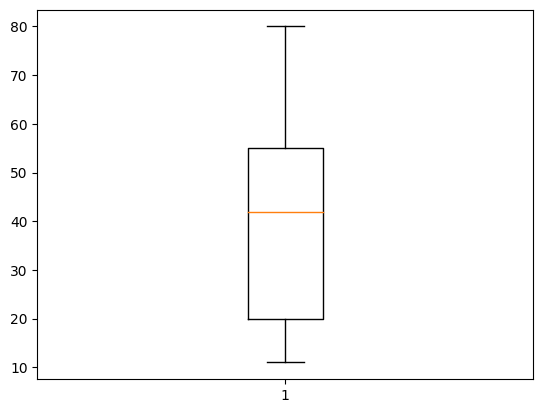

In [19]:
plt.boxplot(user_data['age'])

In [26]:
def divorced(x):
    if x == 'divorced':
        return 1
    else:
        return 0
def single(x):
    if x == 'single':
        return 1
    else:
        return 0
def married(x):
    if x == 'married':
        return 1
    else:
        return 0
def dating(x):
    if x == 'dating':
        return 1
    else:
        return 0
def widow(x):
    if x == 'widow':
        return 1
    else:
        return 0

In [30]:
user_data['divorced'] = user_data['marital'].apply(divorced)
user_data['single'] = user_data['marital'].apply(single)
user_data['married'] = user_data['marital'].apply(married)
user_data['dating'] = user_data['marital'].apply(dating)
user_data['widow'] = user_data['marital'].apply(widow)
user_data

,userid,join_datetime,age,income,kids,teenagers,marital,education,divorced,single,married,dating,widow
0,dc9d5bd4-ec88-4546-b46c-fe9d6eaba691,2023-09-11 21:09:07,70,115443.0,0,0,divorced,bachelor,1,0,0,0,0
1,35821e5c-cc2a-425c-a270-5377de69177c,2023-12-25 14:09:54,71,107793.0,0,1,married,masters,0,0,1,0,0
3,b56b1df3-8a67-4d61-82cf-dd9ed659bd63,2023-12-07 01:57:02,20,81139.0,0,0,single,bachelor,0,1,0,0,0
4,06583f0c-f0b2-4f50-add5-5f16238b33bb,2022-08-22 00:24:55,16,26121.0,0,0,single,masters,0,1,0,0,0
5,607a82ac-14b3-45db-85c1-e0d668b1793a,2024-05-13 20:35:20,58,70183.0,0,0,single,masters,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3399,33ef8a4e-d4e1-4636-bcea-1e68adef3e11,2024-03-30 14:46:24,44,83732.0,0,2,married,bachelor,0,0,1,0,0
3400,8e05c000-746a-4aad-9e9f-4037998de319,2022-10-13 12:55:31,15,26219.0,0,0,single,masters,0,1,0,0,0
3401,0e4d7a7f-84a3-4341-9c5f-6eb400a5c010,2022-07-02 19:00:04,52,71801.0,1,1,married,bachelor,0,0,1,0,0
3402,f44e574b-ef4f-4cf4-9b7c-7bf165c8b990,2023-08-04 06:38:22,20,77725.0,0,0,single,masters,0,1,0,0,0


In [31]:
user_data['education'].value_counts()

bachelor    1558
masters      879
phd          483
basic        160
Name: education, dtype: int64

In [32]:
def bachelor(x):
    if x == 'bachelor':
        return 1
    else:
        return 0
def masters(x):
    if x == 'masters':
        return 1
    else:
        return 0
def phd(x):
    if x == 'phd':
        return 1
    else:
        return 0
def basic(x):
    if x == 'basic':
        return 1
    else:
        return 0

In [33]:
user_data['bachelor'] = user_data['education'].apply(bachelor)
user_data['masters'] = user_data['education'].apply(masters)
user_data['phd'] = user_data['education'].apply(phd)
user_data['basic'] = user_data['education'].apply(basic)

In [41]:
user_data

,userid,join_datetime,age,income,kids,teenagers,marital,education,divorced,single,married,dating,widow,bachelor,masters,phd,basic,year
0,dc9d5bd4-ec88-4546-b46c-fe9d6eaba691,2023-09-11 21:09:07,70,115443.0,0,0,divorced,bachelor,1,0,0,0,0,1,0,0,0,2023-09-11 21:09:07
1,35821e5c-cc2a-425c-a270-5377de69177c,2023-12-25 14:09:54,71,107793.0,0,1,married,masters,0,0,1,0,0,0,1,0,0,2023-12-25 14:09:54
3,b56b1df3-8a67-4d61-82cf-dd9ed659bd63,2023-12-07 01:57:02,20,81139.0,0,0,single,bachelor,0,1,0,0,0,1,0,0,0,2023-12-07 01:57:02
4,06583f0c-f0b2-4f50-add5-5f16238b33bb,2022-08-22 00:24:55,16,26121.0,0,0,single,masters,0,1,0,0,0,0,1,0,0,2022-08-22 00:24:55
5,607a82ac-14b3-45db-85c1-e0d668b1793a,2024-05-13 20:35:20,58,70183.0,0,0,single,masters,0,1,0,0,0,0,1,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3399,33ef8a4e-d4e1-4636-bcea-1e68adef3e11,2024-03-30 14:46:24,44,83732.0,0,2,married,bachelor,0,0,1,0,0,1,0,0,0,NaN
3400,8e05c000-746a-4aad-9e9f-4037998de319,2022-10-13 12:55:31,15,26219.0,0,0,single,masters,0,1,0,0,0,0,1,0,0,NaN
3401,0e4d7a7f-84a3-4341-9c5f-6eb400a5c010,2022-07-02 19:00:04,52,71801.0,1,1,married,bachelor,0,0,1,0,0,1,0,0,0,NaN
3402,f44e574b-ef4f-4cf4-9b7c-7bf165c8b990,2023-08-04 06:38:22,20,77725.0,0,0,single,masters,0,1,0,0,0,0,1,0,0,NaN


In [50]:
user_data['year'] = user_data['join_datetime'].str.slice(0, 4)
user_data['month'] = user_data['join_datetime'].str.slice(5, 7)
user_data['day'] = user_data['join_datetime'].str.slice(8, 10)
user_data

,userid,join_datetime,age,income,kids,teenagers,marital,education,divorced,single,married,dating,widow,bachelor,masters,phd,basic,year,month,day
0,dc9d5bd4-ec88-4546-b46c-fe9d6eaba691,2023-09-11 21:09:07,70,115443.0,0,0,divorced,bachelor,1,0,0,0,0,1,0,0,0,2023,09,11
1,35821e5c-cc2a-425c-a270-5377de69177c,2023-12-25 14:09:54,71,107793.0,0,1,married,masters,0,0,1,0,0,0,1,0,0,2023,12,25
3,b56b1df3-8a67-4d61-82cf-dd9ed659bd63,2023-12-07 01:57:02,20,81139.0,0,0,single,bachelor,0,1,0,0,0,1,0,0,0,2023,12,07
4,06583f0c-f0b2-4f50-add5-5f16238b33bb,2022-08-22 00:24:55,16,26121.0,0,0,single,masters,0,1,0,0,0,0,1,0,0,2022,08,22
5,607a82ac-14b3-45db-85c1-e0d668b1793a,2024-05-13 20:35:20,58,70183.0,0,0,single,masters,0,1,0,0,0,0,1,0,0,2024,05,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3399,33ef8a4e-d4e1-4636-bcea-1e68adef3e11,2024-03-30 14:46:24,44,83732.0,0,2,married,bachelor,0,0,1,0,0,1,0,0,0,2024,03,30
3400,8e05c000-746a-4aad-9e9f-4037998de319,2022-10-13 12:55:31,15,26219.0,0,0,single,masters,0,1,0,0,0,0,1,0,0,2022,10,13
3401,0e4d7a7f-84a3-4341-9c5f-6eb400a5c010,2022-07-02 19:00:04,52,71801.0,1,1,married,bachelor,0,0,1,0,0,1,0,0,0,2022,07,02
3402,f44e574b-ef4f-4cf4-9b7c-7bf165c8b990,2023-08-04 06:38:22,20,77725.0,0,0,single,masters,0,1,0,0,0,0,1,0,0,2023,08,04


In [51]:
user_data.duplicated().sum()

0

In [57]:
order_data.isnull().sum()
order_data = order_data.dropna(how = 'any')

{'whiskers': [<matplotlib.lines.Line2D at 0x2814c1610>,
 'caps': [<matplotlib.lines.Line2D at 0x2810d5410>,
 'boxes': [<matplotlib.lines.Line2D at 0x281477450>],
 'medians': [<matplotlib.lines.Line2D at 0x2811030d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x281102450>],
 'means': []}

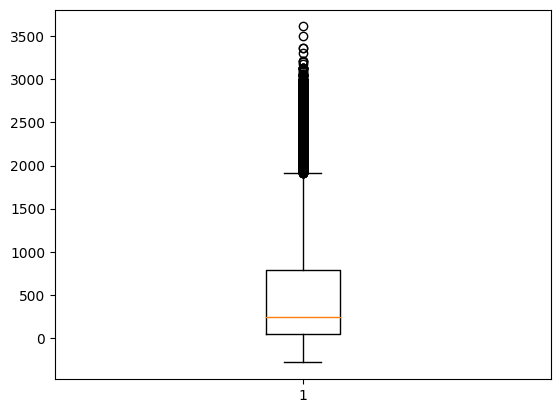

In [58]:
plt.boxplot(order_data['avg_bill'])

In [68]:
weird = order_data[order_data['avg_bill']<0]
weird

,userId,category,avg_bill
36,edd7efd1-ef27-4163-857b-eb4e3cdc5e54,alcohol,-10.0
39,b8fd098f-3ff4-4062-a13a-a19f63546ae3,alcohol,-10.0
42,e76b01da-61df-47e5-bf69-31497f6e386a,alcohol,-10.0
63,bc821c4a-74e3-4c20-a9e6-cb4110cc7e2f,alcohol,-10.0
107,5e5bec92-1b9d-49b3-8b52-b7657947ca2e,alcohol,-10.0
...,...,...,...
23747,798ae440-cdcb-4f51-b917-4a3d3c7dd68d,alcohol,-10.0
23752,2148c95e-f956-4ed8-90f9-b400510edc78,alcohol,-10.0
23766,ca59606d-9079-4d80-8e36-e1068b51d9c3,alcohol,-10.0
23817,e0a0f420-b8ea-42f1-a45d-7304d7eec3c3,alcohol,-10.0


In [72]:
order_data = order_data[order_data['avg_bill'] >=0]
order_data

,userId,category,avg_bill
0,2c6336a2-852b-48af-9150-9b9030387f5d,fish,432.0
1,1085e67c-3c4e-4903-b3e9-16631132c655,other,620.0
2,99792dfd-8c62-4903-92b2-a83dfd392cb1,sweets,233.0
3,ad50b3da-da8d-4b35-92c3-79cf83c2250a,fish,594.0
4,a300c8a3-6280-4a59-8c89-be4212a4eb26,fruits,0.0
...,...,...,...
23830,b2fe4d90-5554-4273-8245-6555e7be1ce1,other,7.0
23831,a6b826f4-a5b3-47b7-ad47-e7a3aee228df,vegetables,0.0
23832,4c2661f2-dfaf-415c-b10b-d281bd0b481e,fruits,0.0
23833,74b3b32a-36a6-49c6-8ff0-3878fc2090ca,sweets,352.0


{'whiskers': [<matplotlib.lines.Line2D at 0x2814ed590>,
 'caps': [<matplotlib.lines.Line2D at 0x2812f9dd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x281537450>],
 'medians': [<matplotlib.lines.Line2D at 0x2814e3bd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2812fb4d0>],
 'means': []}

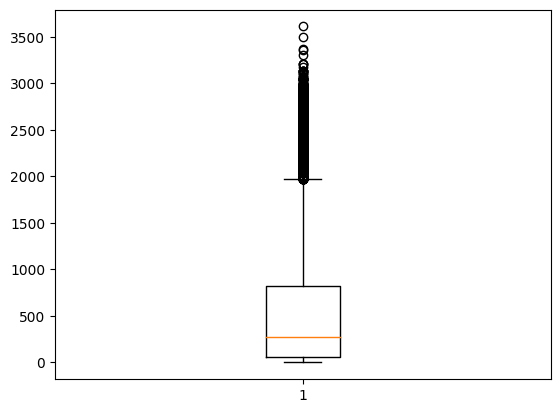

In [73]:
plt.boxplot(order_data['avg_bill'])

In [75]:
order_data = remove_outliers(order_data, 'avg_bill')

In [76]:
interaction_data

,UserId,complain_count,last_order_dt,discount_purchases_count_avg,catalogue_purchases_count_avg,store_purchases_count_avg,website_purchases_count_avg,website_visit_count_avg,mobile_purchases_count_avg,mobile_visit_count_avg,marketing_company_outcome_1,marketing_company_outcome_2,marketing_company_outcome_3,marketing_company_outcome_4,marketing_company_outcome_5
0,fa432faf-93f6-4dbf-ae14-8a8b681a106f,0,2024-06-22,2,0,4,3,7,18,33,0,0,0,0,0
1,3146a104-ede9-4cbb-8869-b65cf60a35d0,0,2024-05-17,2,0,0,2,5,3,1,1,1,0,1,0
2,191455cb-b4cc-4ef4-abf6-056349caf299,2,2024-05-27,2,2,8,6,6,1,1,0,0,0,0,0
3,e0037cb7-8e9a-4adf-b03a-ea8d9bcb67e9,0,2024-06-03,5,0,2,1,0,4,41,0,0,1,1,1
4,00c8adb8-4694-4137-a352-404bd16cd299,0,2024-07-02,0,0,2,0,4,0,39,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3400,21210d57-efad-46cc-82d8-4efc2475b681,2,2024-07-04,1,9,6,5,2,3,5,0,0,0,0,0
3401,010fe525-912c-4b69-8eca-2e9c719c1f97,1,2024-07-02,0,0,1,1,3,2,24,1,1,1,1,0
3402,c29d31be-8100-40e2-b547-b925da7d9a5c,0,2024-07-04,1,0,2,1,7,4,7,0,0,0,0,0
3403,a0c31e08-22eb-4ca9-aeb8-9c0a37d7b224,0,2024-06-26,4,2,12,5,5,17,31,0,0,0,0,0


In [77]:
interaction_data.isnull().sum()

UserId                            0
complain_count                    0
last_order_dt                    64
discount_purchases_count_avg      0
catalogue_purchases_count_avg     0
store_purchases_count_avg         0
website_purchases_count_avg       0
website_visit_count_avg           0
mobile_purchases_count_avg        0
mobile_visit_count_avg            0
marketing_company_outcome_1       0
marketing_company_outcome_2       0
marketing_company_outcome_3       0
marketing_company_outcome_4       0
marketing_company_outcome_5       0
dtype: int64

In [78]:
interaction_data = interaction_data.dropna(how = 'any')

In [79]:
order_data = order_data.rename(columns={"userId": "userid"})

In [83]:
interaction_data.sum()

UserId                           fa432faf-93f6-4dbf-ae14-8a8b681a106f3146a104-e...
complain_count                                                                1927
last_order_dt                    2024-06-222024-05-172024-05-272024-06-032024-0...
discount_purchases_count_avg                                                 12727
catalogue_purchases_count_avg                                                 6902
store_purchases_count_avg                                                    15197
website_purchases_count_avg                                                  10980
website_visit_count_avg                                                      19707
mobile_purchases_count_avg                                                   36619
mobile_visit_count_avg                                                       91364
marketing_company_outcome_1                                                    724
marketing_company_outcome_2                                                    630
mark

In [84]:
interaction_data.corr()

/var/folders/2j/3ct3s54n3jxgmw9x4pcykxvw0000gn/T/ipykernel_10362/470934407.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  interaction_data.corr()


,complain_count,discount_purchases_count_avg,catalogue_purchases_count_avg,store_purchases_count_avg,website_purchases_count_avg,website_visit_count_avg,mobile_purchases_count_avg,mobile_visit_count_avg,marketing_company_outcome_1,marketing_company_outcome_2,marketing_company_outcome_3,marketing_company_outcome_4,marketing_company_outcome_5
complain_count,1.000000,-0.001299,0.029753,0.005419,0.016128,-0.021024,-0.000360,-0.000183,0.007412,0.001514,-0.019054,-0.013861,0.001235
discount_purchases_count_avg,-0.001299,1.000000,0.070893,0.001668,0.069839,0.574469,0.556978,0.651511,0.172896,0.220422,0.171988,0.178526,0.143369
catalogue_purchases_count_avg,0.029753,0.070893,1.000000,0.618202,0.459655,-0.100375,0.184237,0.068598,-0.012418,-0.166806,-0.096742,-0.064694,-0.015407
store_purchases_count_avg,0.005419,0.001668,0.618202,1.000000,0.576951,-0.104768,0.146397,-0.066747,-0.197099,-0.318816,-0.288197,-0.173394,-0.181334
website_purchases_count_avg,0.016128,0.069839,0.459655,0.576951,1.000000,0.046945,0.129504,-0.038692,-0.136553,-0.237093,-0.185699,-0.121362,-0.139680
website_visit_count_avg,-0.021024,0.574469,-0.100375,-0.104768,0.046945,1.000000,0.557911,0.561199,0.069572,0.100454,0.141541,0.093062,0.010485
mobile_purchases_count_avg,-0.000360,0.556978,0.184237,0.146397,0.129504,0.557911,1.000000,0.771933,0.051936,0.060225,0.081535,0.072829,0.044564
mobile_visit_count_avg,-0.000183,0.651511,0.068598,-0.066747,-0.038692,0.561199,0.771933,1.000000,0.248005,0.280665,0.254258,0.236152,0.238490
marketing_company_outcome_1,0.007412,0.172896,-0.012418,-0.197099,-0.136553,0.069572,0.051936,0.248005,1.000000,0.355622,0.265903,0.277878,0.375176
marketing_company_outcome_2,0.001514,0.220422,-0.166806,-0.318816,-0.237093,0.100454,0.060225,0.280665,0.355622,1.000000,0.339415,0.317310,0.325656


In [85]:
user_data.corr()

/var/folders/2j/3ct3s54n3jxgmw9x4pcykxvw0000gn/T/ipykernel_10362/3611880121.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  user_data.corr()


,age,income,kids,teenagers,divorced,single,married,dating,widow,bachelor,masters,phd,basic
age,1.000000,0.632664,0.261192,0.577640,0.199535,-0.685736,0.345716,0.312957,0.175770,0.095688,-0.265389,0.312808,-0.188070
income,0.632664,1.000000,-0.035974,0.294081,0.129736,-0.474290,0.260920,0.207047,0.095702,0.171601,-0.259114,0.239624,-0.251949
kids,0.261192,-0.035974,1.000000,0.168825,0.070622,-0.301194,0.192639,0.139151,-0.016436,0.059371,-0.120290,0.090995,-0.038072
teenagers,0.577640,0.294081,0.168825,1.000000,0.143380,-0.425018,0.215609,0.184890,0.094635,0.032036,-0.143123,0.219902,-0.141245
divorced,0.199535,0.129736,0.070622,0.143380,1.000000,-0.264954,-0.155912,-0.120024,-0.041339,0.033084,-0.064064,0.068962,-0.057165
single,-0.685736,-0.474290,-0.301194,-0.425018,-0.264954,1.000000,-0.570390,-0.439096,-0.151234,-0.094641,0.229155,-0.235277,0.132409
married,0.345716,0.260920,0.192639,0.215609,-0.155912,-0.570390,1.000000,-0.258386,-0.088994,0.056107,-0.137390,0.135081,-0.068158
dating,0.312957,0.207047,0.139151,0.184890,-0.120024,-0.439096,-0.258386,1.000000,-0.068509,0.041048,-0.086649,0.081285,-0.049339
widow,0.175770,0.095702,-0.016436,0.094635,-0.041339,-0.151234,-0.088994,-0.068509,1.000000,-0.003959,-0.044375,0.076549,-0.026208
bachelor,0.095688,0.171601,0.059371,0.032036,0.033084,-0.094641,0.056107,0.041048,-0.003959,1.000000,-0.639383,-0.436329,-0.236834


In [94]:
plt.boxplot(interaction_data['total_orders'])

KeyError: 'total_orders'

In [89]:
interaction_data['marketing_total'] = interaction_data['marketing_company_outcome_1'] + interaction_data['marketing_company_outcome_2'] + interaction_data['marketing_company_outcome_3'] + interaction_data['marketing_company_outcome_4'] + interaction_data['marketing_company_outcome_5']

/var/folders/2j/3ct3s54n3jxgmw9x4pcykxvw0000gn/T/ipykernel_10362/2262792201.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interaction_data['marketing_total'] = interaction_data['marketing_company_outcome_1'] + interaction_data['marketing_company_outcome_2'] + interaction_data['marketing_company_outcome_3'] + interaction_data['marketing_company_outcome_4'] + interaction_data['marketing_company_outcome_5']


(array([1751.,    0.,  506.,    0.,  437.,    0.,  422.,    0.,  178.,
          47.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

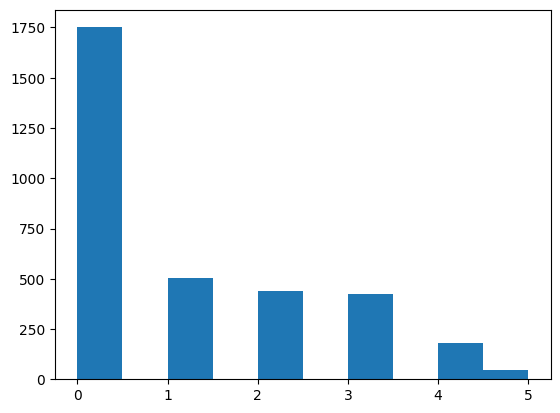

In [91]:
plt.hist(interaction_data['marketing_total'])

In [92]:
interaction_data.corr()

/var/folders/2j/3ct3s54n3jxgmw9x4pcykxvw0000gn/T/ipykernel_10362/470934407.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  interaction_data.corr()


,complain_count,discount_purchases_count_avg,catalogue_purchases_count_avg,store_purchases_count_avg,website_purchases_count_avg,website_visit_count_avg,mobile_purchases_count_avg,mobile_visit_count_avg,marketing_company_outcome_1,marketing_company_outcome_2,marketing_company_outcome_3,marketing_company_outcome_4,marketing_company_outcome_5,total_orders,marketing_total
complain_count,1.000000,-0.001299,0.029753,0.005419,0.016128,-0.021024,-0.000360,-0.000183,0.007412,0.001514,-0.019054,-0.013861,0.001235,0.009193,-0.007011
discount_purchases_count_avg,-0.001299,1.000000,0.070893,0.001668,0.069839,0.574469,0.556978,0.651511,0.172896,0.220422,0.171988,0.178526,0.143369,0.464184,0.266286
catalogue_purchases_count_avg,0.029753,0.070893,1.000000,0.618202,0.459655,-0.100375,0.184237,0.068598,-0.012418,-0.166806,-0.096742,-0.064694,-0.015407,0.543423,-0.105702
store_purchases_count_avg,0.005419,0.001668,0.618202,1.000000,0.576951,-0.104768,0.146397,-0.066747,-0.197099,-0.318816,-0.288197,-0.173394,-0.181334,0.552491,-0.347793
website_purchases_count_avg,0.016128,0.069839,0.459655,0.576951,1.000000,0.046945,0.129504,-0.038692,-0.136553,-0.237093,-0.185699,-0.121362,-0.139680,0.498729,-0.245964
website_visit_count_avg,-0.021024,0.574469,-0.100375,-0.104768,0.046945,1.000000,0.557911,0.561199,0.069572,0.100454,0.141541,0.093062,0.010485,0.407126,0.124819
mobile_purchases_count_avg,-0.000360,0.556978,0.184237,0.146397,0.129504,0.557911,1.000000,0.771933,0.051936,0.060225,0.081535,0.072829,0.044564,0.875639,0.093744
mobile_visit_count_avg,-0.000183,0.651511,0.068598,-0.066747,-0.038692,0.561199,0.771933,1.000000,0.248005,0.280665,0.254258,0.236152,0.238490,0.597292,0.378154
marketing_company_outcome_1,0.007412,0.172896,-0.012418,-0.197099,-0.136553,0.069572,0.051936,0.248005,1.000000,0.355622,0.265903,0.277878,0.375176,-0.030434,0.684892
marketing_company_outcome_2,0.001514,0.220422,-0.166806,-0.318816,-0.237093,0.100454,0.060225,0.280665,0.355622,1.000000,0.339415,0.317310,0.325656,-0.096805,0.694483


In [97]:
user_data

,userid,join_datetime,age,income,kids,teenagers,marital,education,divorced,single,married,dating,widow,bachelor,masters,phd,basic,year,month,day
0,dc9d5bd4-ec88-4546-b46c-fe9d6eaba691,2023-09-11 21:09:07,70,115443.0,0,0,divorced,bachelor,1,0,0,0,0,1,0,0,0,2023,09,11
1,35821e5c-cc2a-425c-a270-5377de69177c,2023-12-25 14:09:54,71,107793.0,0,1,married,masters,0,0,1,0,0,0,1,0,0,2023,12,25
3,b56b1df3-8a67-4d61-82cf-dd9ed659bd63,2023-12-07 01:57:02,20,81139.0,0,0,single,bachelor,0,1,0,0,0,1,0,0,0,2023,12,07
4,06583f0c-f0b2-4f50-add5-5f16238b33bb,2022-08-22 00:24:55,16,26121.0,0,0,single,masters,0,1,0,0,0,0,1,0,0,2022,08,22
5,607a82ac-14b3-45db-85c1-e0d668b1793a,2024-05-13 20:35:20,58,70183.0,0,0,single,masters,0,1,0,0,0,0,1,0,0,2024,05,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3399,33ef8a4e-d4e1-4636-bcea-1e68adef3e11,2024-03-30 14:46:24,44,83732.0,0,2,married,bachelor,0,0,1,0,0,1,0,0,0,2024,03,30
3400,8e05c000-746a-4aad-9e9f-4037998de319,2022-10-13 12:55:31,15,26219.0,0,0,single,masters,0,1,0,0,0,0,1,0,0,2022,10,13
3401,0e4d7a7f-84a3-4341-9c5f-6eb400a5c010,2022-07-02 19:00:04,52,71801.0,1,1,married,bachelor,0,0,1,0,0,1,0,0,0,2022,07,02
3402,f44e574b-ef4f-4cf4-9b7c-7bf165c8b990,2023-08-04 06:38:22,20,77725.0,0,0,single,masters,0,1,0,0,0,0,1,0,0,2023,08,04


(array([161.,  91., 202.,  74.,  90., 145.,  82., 151.,  79.,   1.,   6.,
          5.,  12.,  29.,  25.,  48.,  37.,  27.,  73.,  36.,  29.,  79.,
         63., 124.,  69.,  64., 136.,  79., 136.,  50.,  41., 115.,  38.,
         42.,  76.,  42.,  93.,  37.,  51.,  89.,  35.,  48.,  68.,  28.,
         36.,  16.,   7.,  13.,   0.,   2.]),
 array([11.  , 12.38, 13.76, 15.14, 16.52, 17.9 , 19.28, 20.66, 22.04,
        23.42, 24.8 , 26.18, 27.56, 28.94, 30.32, 31.7 , 33.08, 34.46,
        35.84, 37.22, 38.6 , 39.98, 41.36, 42.74, 44.12, 45.5 , 46.88,
        48.26, 49.64, 51.02, 52.4 , 53.78, 55.16, 56.54, 57.92, 59.3 ,
        60.68, 62.06, 63.44, 64.82, 66.2 , 67.58, 68.96, 70.34, 71.72,
        73.1 , 74.48, 75.86, 77.24, 78.62, 80.  ]),
 <BarContainer object of 50 artists>)

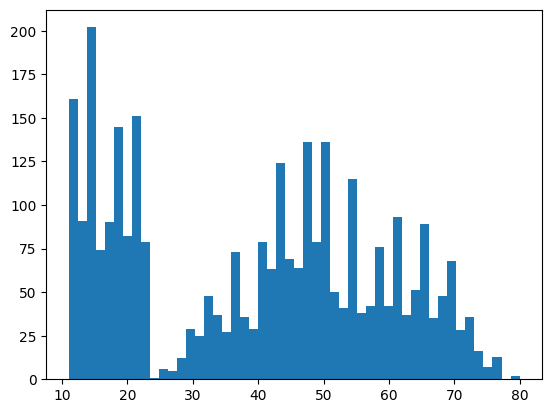

In [99]:
plt.hist(user_data['age'], bins = 50)

In [100]:
user_data['age'].value_counts()

15    107
14     95
13     91
17     90
18     84
     ... 
25      3
26      3
79      1
24      1
80      1
Name: age, Length: 69, dtype: int64

In [102]:
interaction_data

0       25
1        5
2       15
3        7
4        2
        ..
3400    14
3401     4
3402     7
3403    34
3404     5
Length: 3341, dtype: int64

In [131]:
interaction_data = pd.read_csv('interactiondata-ef3a6513-9759-444d-8190-c34674e598ad.csv')
interaction_data = interaction_data.dropna(how = 'any')
interaction_data = interaction_data.rename(columns={"UserId": "userId"})
order_data = order_data.rename(columns={"userid": "userId"})
user_data = user_data.rename(columns = {'userid':'userId'})

In [176]:
merged = pd.merge(interaction_data, user_data, on = 'userId')

In [147]:
gr = merged.groupby('age').mean().reset_index()

/var/folders/2j/3ct3s54n3jxgmw9x4pcykxvw0000gn/T/ipykernel_10362/246040844.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gr = merged.groupby('age').mean().reset_index()


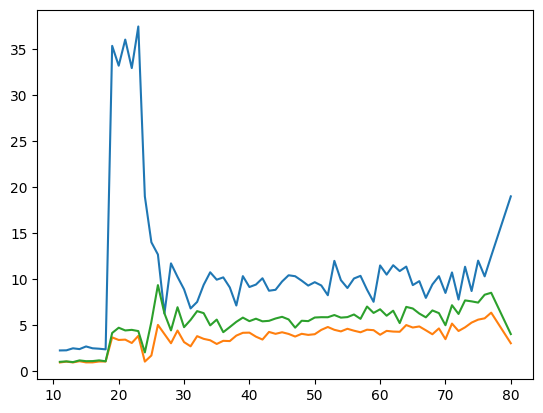

In [152]:
plt.plot(gr['age'], gr['mobile_purchases_count_avg'])
plt.plot(gr['age'], gr['website_purchases_count_avg'])
plt.plot(gr['age'], gr['store_purchases_count_avg'])

In [310]:
kids_merged = merged[merged['age'] < 18]
print(kids_merged['marketing_company_outcome_1'].sum()/kids_merged['marketing_company_outcome_1'].count())
print(kids_merged['marketing_company_outcome_2'].sum()/kids_merged['marketing_company_outcome_2'].count())
print(kids_merged['marketing_company_outcome_3'].sum()/kids_merged['marketing_company_outcome_3'].count())
print(kids_merged['marketing_company_outcome_4'].sum()/kids_merged['marketing_company_outcome_4'].count())
print(kids_merged['marketing_company_outcome_5'].sum()/kids_merged['marketing_company_outcome_5'].count())

0.49585406301824214
0.5422885572139303
0.5373134328358209
0.47429519071310117
0.5207296849087893


In [311]:
adult_merged = merged[(merged['age'] >= 18) & (merged['age'] <= 23)]
print(adult_merged['marketing_company_outcome_1'].sum()/adult_merged['marketing_company_outcome_1'].count())
print(adult_merged['marketing_company_outcome_2'].sum()/adult_merged['marketing_company_outcome_2'].count())
print(adult_merged['marketing_company_outcome_3'].sum()/adult_merged['marketing_company_outcome_3'].count())
print(adult_merged['marketing_company_outcome_4'].sum()/adult_merged['marketing_company_outcome_4'].count())
print(adult_merged['marketing_company_outcome_5'].sum()/adult_merged['marketing_company_outcome_5'].count())

0.4812680115273775
0.4755043227665706
0.5014409221902018
0.4610951008645533
0.48703170028818443


In [318]:
fail_merged = merged[(merged['age'] >= 24) & (merged['age'] <= 30)]
print(fail_merged['marketing_company_outcome_1'].sum()/fail_merged['marketing_company_outcome_1'].count())
print(fail_merged['marketing_company_outcome_2'].sum()/fail_merged['marketing_company_outcome_2'].count())
print(fail_merged['marketing_company_outcome_3'].sum()/fail_merged['marketing_company_outcome_3'].count())
print(fail_merged['marketing_company_outcome_4'].sum()/fail_merged['marketing_company_outcome_4'].count())
print(fail_merged['marketing_company_outcome_5'].sum()/fail_merged['marketing_company_outcome_5'].count())

0.1276595744680851
0.0425531914893617
0.10638297872340426
0.0851063829787234
0.2127659574468085


In [319]:
else_merged = merged[merged['age'] >= 31]
print(else_merged['marketing_company_outcome_1'].sum()/else_merged['marketing_company_outcome_1'].count())
print(else_merged['marketing_company_outcome_2'].sum()/else_merged['marketing_company_outcome_2'].count())
print(else_merged['marketing_company_outcome_3'].sum()/else_merged['marketing_company_outcome_3'].count())
print(else_merged['marketing_company_outcome_4'].sum()/else_merged['marketing_company_outcome_4'].count())
print(else_merged['marketing_company_outcome_5'].sum()/else_merged['marketing_company_outcome_5'].count())

0.060090702947845805
0.011904761904761904
0.07369614512471655
0.0782312925170068
0.07086167800453515


In [177]:
merged

,userId,complain_count,last_order_dt,discount_purchases_count_avg,catalogue_purchases_count_avg,store_purchases_count_avg,website_purchases_count_avg,website_visit_count_avg,mobile_purchases_count_avg,mobile_visit_count_avg,...,married,dating,widow,bachelor,masters,phd,basic,year,month,day
0,fa432faf-93f6-4dbf-ae14-8a8b681a106f,0,2024-06-22,2,0,4,3,7,18,33,...,0,1,0,1,0,0,0,2023,07,04
1,191455cb-b4cc-4ef4-abf6-056349caf299,2,2024-05-27,2,2,8,6,6,1,1,...,0,0,0,0,0,1,0,2023,01,20
2,e0037cb7-8e9a-4adf-b03a-ea8d9bcb67e9,0,2024-06-03,5,0,2,1,0,4,41,...,0,0,0,0,1,0,0,2023,03,06
3,00c8adb8-4694-4137-a352-404bd16cd299,0,2024-07-02,0,0,2,0,4,0,39,...,0,0,0,0,0,0,1,2024,01,21
4,38c84b62-8717-4918-bb1a-53957d14ca81,0,2024-05-25,2,0,3,2,8,9,16,...,0,1,0,1,0,0,0,2022,07,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3016,7dd9469d-c2a3-4649-bb31-fdce0715e1a9,2,2024-07-08,4,5,13,4,2,21,38,...,0,1,0,1,0,0,0,2023,09,10
3017,21210d57-efad-46cc-82d8-4efc2475b681,2,2024-07-04,1,9,6,5,2,3,5,...,0,1,0,0,0,1,0,2023,09,27
3018,010fe525-912c-4b69-8eca-2e9c719c1f97,1,2024-07-02,0,0,1,1,3,2,24,...,0,0,0,0,0,0,1,2023,11,17
3019,c29d31be-8100-40e2-b547-b925da7d9a5c,0,2024-07-04,1,0,2,1,7,4,7,...,0,0,0,0,1,0,0,2023,08,06


In [180]:
merged

,userId,complain_count,last_order_dt,discount_purchases_count_avg,catalogue_purchases_count_avg,store_purchases_count_avg,website_purchases_count_avg,website_visit_count_avg,mobile_purchases_count_avg,mobile_visit_count_avg,...,married,dating,widow,bachelor,masters,phd,basic,year,month,day
0,fa432faf-93f6-4dbf-ae14-8a8b681a106f,0,2024-06-22,2,0,4,3,7,18,33,...,0,1,0,1,0,0,0,2023,07,04
1,191455cb-b4cc-4ef4-abf6-056349caf299,2,2024-05-27,2,2,8,6,6,1,1,...,0,0,0,0,0,1,0,2023,01,20
2,e0037cb7-8e9a-4adf-b03a-ea8d9bcb67e9,0,2024-06-03,5,0,2,1,0,4,41,...,0,0,0,0,1,0,0,2023,03,06
3,00c8adb8-4694-4137-a352-404bd16cd299,0,2024-07-02,0,0,2,0,4,0,39,...,0,0,0,0,0,0,1,2024,01,21
4,38c84b62-8717-4918-bb1a-53957d14ca81,0,2024-05-25,2,0,3,2,8,9,16,...,0,1,0,1,0,0,0,2022,07,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3016,7dd9469d-c2a3-4649-bb31-fdce0715e1a9,2,2024-07-08,4,5,13,4,2,21,38,...,0,1,0,1,0,0,0,2023,09,10
3017,21210d57-efad-46cc-82d8-4efc2475b681,2,2024-07-04,1,9,6,5,2,3,5,...,0,1,0,0,0,1,0,2023,09,27
3018,010fe525-912c-4b69-8eca-2e9c719c1f97,1,2024-07-02,0,0,1,1,3,2,24,...,0,0,0,0,0,0,1,2023,11,17
3019,c29d31be-8100-40e2-b547-b925da7d9a5c,0,2024-07-04,1,0,2,1,7,4,7,...,0,0,0,0,1,0,0,2023,08,06


In [185]:
merged['last_order_month'] = merged['last_order_dt'].str.slice(0, 7)
merged['registration_month'] = merged['join_datetime'].str.slice(0, 7)
merged

,userId,complain_count,last_order_dt,discount_purchases_count_avg,catalogue_purchases_count_avg,store_purchases_count_avg,website_purchases_count_avg,website_visit_count_avg,mobile_purchases_count_avg,mobile_visit_count_avg,...,widow,bachelor,masters,phd,basic,year,month,day,last_order_month,registration_month
0,fa432faf-93f6-4dbf-ae14-8a8b681a106f,0,2024-06-22,2,0,4,3,7,18,33,...,0,1,0,0,0,2023,07,04,2024-06,2023-07
1,191455cb-b4cc-4ef4-abf6-056349caf299,2,2024-05-27,2,2,8,6,6,1,1,...,0,0,0,1,0,2023,01,20,2024-05,2023-01
2,e0037cb7-8e9a-4adf-b03a-ea8d9bcb67e9,0,2024-06-03,5,0,2,1,0,4,41,...,0,0,1,0,0,2023,03,06,2024-06,2023-03
3,00c8adb8-4694-4137-a352-404bd16cd299,0,2024-07-02,0,0,2,0,4,0,39,...,0,0,0,0,1,2024,01,21,2024-07,2024-01
4,38c84b62-8717-4918-bb1a-53957d14ca81,0,2024-05-25,2,0,3,2,8,9,16,...,0,1,0,0,0,2022,07,31,2024-05,2022-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3016,7dd9469d-c2a3-4649-bb31-fdce0715e1a9,2,2024-07-08,4,5,13,4,2,21,38,...,0,1,0,0,0,2023,09,10,2024-07,2023-09
3017,21210d57-efad-46cc-82d8-4efc2475b681,2,2024-07-04,1,9,6,5,2,3,5,...,0,0,0,1,0,2023,09,27,2024-07,2023-09
3018,010fe525-912c-4b69-8eca-2e9c719c1f97,1,2024-07-02,0,0,1,1,3,2,24,...,0,0,0,0,1,2023,11,17,2024-07,2023-11
3019,c29d31be-8100-40e2-b547-b925da7d9a5c,0,2024-07-04,1,0,2,1,7,4,7,...,0,0,1,0,0,2023,08,06,2024-07,2023-08


In [189]:
a = merged.groupby('last_order_month').count().reset_index()
a

,last_order_month,userId,complain_count,last_order_dt,discount_purchases_count_avg,catalogue_purchases_count_avg,store_purchases_count_avg,website_purchases_count_avg,website_visit_count_avg,mobile_purchases_count_avg,...,dating,widow,bachelor,masters,phd,basic,year,month,day,registration_month
0,2024-05,510,510,510,510,510,510,510,510,510,...,510,510,510,510,510,510,510,510,510,510
1,2024-06,1454,1454,1454,1454,1454,1454,1454,1454,1454,...,1454,1454,1454,1454,1454,1454,1454,1454,1454,1454
2,2024-07,1057,1057,1057,1057,1057,1057,1057,1057,1057,...,1057,1057,1057,1057,1057,1057,1057,1057,1057,1057


<BarContainer object of 3 artists>

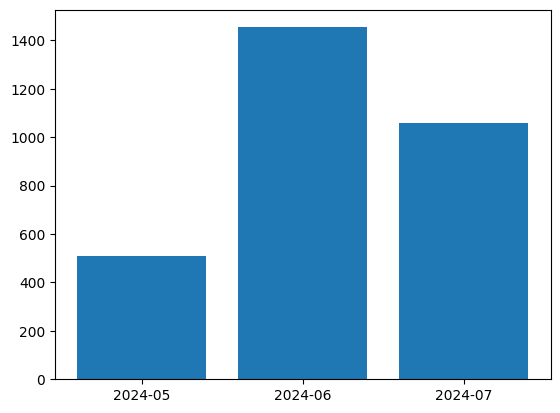

In [190]:
plt.bar(a['last_order_month'], a['userId'])

In [192]:
b = merged.groupby('registration_month').count().reset_index()
b

,registration_month,userId,complain_count,last_order_dt,discount_purchases_count_avg,catalogue_purchases_count_avg,store_purchases_count_avg,website_purchases_count_avg,website_visit_count_avg,mobile_purchases_count_avg,...,dating,widow,bachelor,masters,phd,basic,year,month,day,last_order_month
0,2022-04,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
1,2022-05,85,85,85,85,85,85,85,85,85,...,85,85,85,85,85,85,85,85,85,85
2,2022-06,90,90,90,90,90,90,90,90,90,...,90,90,90,90,90,90,90,90,90,90
3,2022-07,98,98,98,98,98,98,98,98,98,...,98,98,98,98,98,98,98,98,98,98
4,2022-08,88,88,88,88,88,88,88,88,88,...,88,88,88,88,88,88,88,88,88,88
5,2022-09,90,90,90,90,90,90,90,90,90,...,90,90,90,90,90,90,90,90,90,90
6,2022-10,87,87,87,87,87,87,87,87,87,...,87,87,87,87,87,87,87,87,87,87
7,2022-11,116,116,116,116,116,116,116,116,116,...,116,116,116,116,116,116,116,116,116,116
8,2022-12,123,123,123,123,123,123,123,123,123,...,123,123,123,123,123,123,123,123,123,123
9,2023-01,145,145,145,145,145,145,145,145,145,...,145,145,145,145,145,145,145,145,145,145


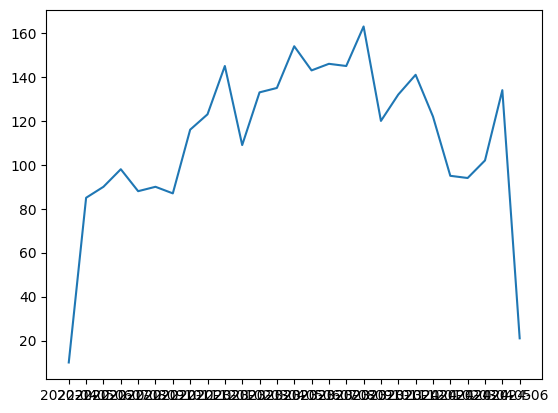

In [193]:
plt.plot(b['registration_month'], b['userId'])

In [194]:
# Скидки - кто пользуется
gr = merged.groupby('age').mean().reset_index()
gr

/var/folders/2j/3ct3s54n3jxgmw9x4pcykxvw0000gn/T/ipykernel_10362/4233360114.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gr = merged.groupby('age').mean().reset_index()


,age,complain_count,discount_purchases_count_avg,catalogue_purchases_count_avg,store_purchases_count_avg,website_purchases_count_avg,website_visit_count_avg,mobile_purchases_count_avg,mobile_visit_count_avg,marketing_company_outcome_1,...,teenagers,divorced,single,married,dating,widow,bachelor,masters,phd,basic
0,11,0.594595,2.594595,0.000000,0.972973,0.905405,3.743243,2.216216,23.013514,0.472973,...,0.0000,0.000000,1.000000,0.000000,0.000000,0.000000,0.189189,0.594595,0.000000,0.216216
1,12,0.602410,2.216867,0.000000,1.024096,1.000000,3.686747,2.228916,24.566265,0.409639,...,0.0000,0.000000,1.000000,0.000000,0.000000,0.000000,0.313253,0.530120,0.000000,0.156627
2,13,0.696629,2.595506,0.000000,0.943820,0.910112,4.157303,2.449438,24.662921,0.539326,...,0.0000,0.000000,1.000000,0.000000,0.000000,0.000000,0.280899,0.629213,0.000000,0.089888
3,14,0.604396,2.208791,0.000000,1.131868,1.043956,3.879121,2.362637,23.318681,0.450549,...,0.0000,0.000000,1.000000,0.000000,0.000000,0.000000,0.208791,0.549451,0.000000,0.241758
4,15,0.556604,2.415094,0.000000,1.047170,0.915094,4.547170,2.650943,22.094340,0.528302,...,0.0000,0.000000,1.000000,0.000000,0.000000,0.000000,0.358491,0.556604,0.000000,0.084906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,74,0.500000,2.062500,3.000000,7.562500,5.250000,4.937500,8.687500,15.375000,0.312500,...,0.1875,0.000000,0.187500,0.437500,0.375000,0.000000,0.312500,0.187500,0.500000,0.000000
64,75,0.571429,1.142857,4.285714,7.428571,5.571429,4.000000,12.000000,21.571429,0.000000,...,0.0000,0.000000,0.142857,0.428571,0.285714,0.142857,0.285714,0.142857,0.571429,0.000000
65,76,0.571429,1.142857,4.571429,8.285714,5.714286,3.142857,10.285714,18.142857,0.285714,...,0.0000,0.142857,0.142857,0.571429,0.000000,0.142857,0.428571,0.285714,0.285714,0.000000
66,77,0.333333,1.500000,6.000000,8.500000,6.333333,4.000000,12.500000,22.500000,0.000000,...,0.0000,0.333333,0.166667,0.333333,0.000000,0.166667,0.000000,0.333333,0.666667,0.000000


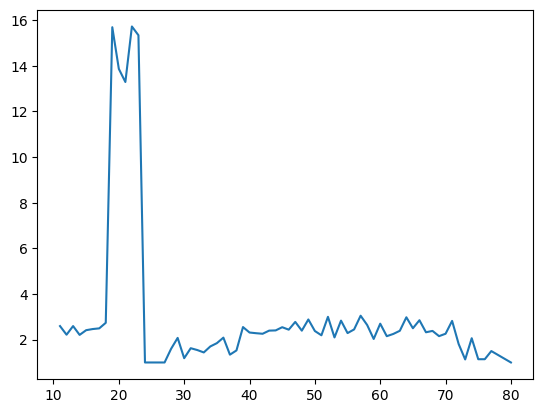

In [195]:
plt.plot(gr['age'], gr['discount_purchases_count_avg'])

In [196]:
merged['discount_share'] = merged['discount_purchases_count_avg']/(merged['website_purchases_count_avg'] + merged['mobile_purchases_count_avg'] + merged['store_purchases_count_avg'])

In [197]:
gr = merged.groupby('age').mean().reset_index()
gr

/var/folders/2j/3ct3s54n3jxgmw9x4pcykxvw0000gn/T/ipykernel_10362/947894272.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gr = merged.groupby('age').mean().reset_index()


,age,complain_count,discount_purchases_count_avg,catalogue_purchases_count_avg,store_purchases_count_avg,website_purchases_count_avg,website_visit_count_avg,mobile_purchases_count_avg,mobile_visit_count_avg,marketing_company_outcome_1,...,divorced,single,married,dating,widow,bachelor,masters,phd,basic,discount_share
0,11,0.594595,2.594595,0.000000,0.972973,0.905405,3.743243,2.216216,23.013514,0.472973,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.189189,0.594595,0.000000,0.216216,NaN
1,12,0.602410,2.216867,0.000000,1.024096,1.000000,3.686747,2.228916,24.566265,0.409639,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.313253,0.530120,0.000000,0.156627,NaN
2,13,0.696629,2.595506,0.000000,0.943820,0.910112,4.157303,2.449438,24.662921,0.539326,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.280899,0.629213,0.000000,0.089888,NaN
3,14,0.604396,2.208791,0.000000,1.131868,1.043956,3.879121,2.362637,23.318681,0.450549,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.208791,0.549451,0.000000,0.241758,NaN
4,15,0.556604,2.415094,0.000000,1.047170,0.915094,4.547170,2.650943,22.094340,0.528302,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.358491,0.556604,0.000000,0.084906,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,74,0.500000,2.062500,3.000000,7.562500,5.250000,4.937500,8.687500,15.375000,0.312500,...,0.000000,0.187500,0.437500,0.375000,0.000000,0.312500,0.187500,0.500000,0.000000,0.110942
64,75,0.571429,1.142857,4.285714,7.428571,5.571429,4.000000,12.000000,21.571429,0.000000,...,0.000000,0.142857,0.428571,0.285714,0.142857,0.285714,0.142857,0.571429,0.000000,0.045462
65,76,0.571429,1.142857,4.571429,8.285714,5.714286,3.142857,10.285714,18.142857,0.285714,...,0.142857,0.142857,0.571429,0.000000,0.142857,0.428571,0.285714,0.285714,0.000000,0.053577
66,77,0.333333,1.500000,6.000000,8.500000,6.333333,4.000000,12.500000,22.500000,0.000000,...,0.333333,0.166667,0.333333,0.000000,0.166667,0.000000,0.333333,0.666667,0.000000,0.056695


In [207]:
merged = merged[(merged['website_purchases_count_avg'] >= 0) & (merged['mobile_purchases_count_avg'] >=0) & (merged['store_purchases_count_avg']>=0) & (merged ['catalogue_purchases_count_avg'] >=0)]

In [208]:
merged

,userId,complain_count,last_order_dt,discount_purchases_count_avg,catalogue_purchases_count_avg,store_purchases_count_avg,website_purchases_count_avg,website_visit_count_avg,mobile_purchases_count_avg,mobile_visit_count_avg,...,bachelor,masters,phd,basic,year,month,day,last_order_month,registration_month,discount_share
0,fa432faf-93f6-4dbf-ae14-8a8b681a106f,0,2024-06-22,2,0,4,3,7,18,33,...,1,0,0,0,2023,07,04,2024-06,2023-07,0.080000
1,191455cb-b4cc-4ef4-abf6-056349caf299,2,2024-05-27,2,2,8,6,6,1,1,...,0,0,1,0,2023,01,20,2024-05,2023-01,0.133333
2,e0037cb7-8e9a-4adf-b03a-ea8d9bcb67e9,0,2024-06-03,5,0,2,1,0,4,41,...,0,1,0,0,2023,03,06,2024-06,2023-03,0.714286
3,00c8adb8-4694-4137-a352-404bd16cd299,0,2024-07-02,0,0,2,0,4,0,39,...,0,0,0,1,2024,01,21,2024-07,2024-01,0.000000
4,38c84b62-8717-4918-bb1a-53957d14ca81,0,2024-05-25,2,0,3,2,8,9,16,...,1,0,0,0,2022,07,31,2024-05,2022-07,0.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3016,7dd9469d-c2a3-4649-bb31-fdce0715e1a9,2,2024-07-08,4,5,13,4,2,21,38,...,1,0,0,0,2023,09,10,2024-07,2023-09,0.105263
3017,21210d57-efad-46cc-82d8-4efc2475b681,2,2024-07-04,1,9,6,5,2,3,5,...,0,0,1,0,2023,09,27,2024-07,2023-09,0.071429
3018,010fe525-912c-4b69-8eca-2e9c719c1f97,1,2024-07-02,0,0,1,1,3,2,24,...,0,0,0,1,2023,11,17,2024-07,2023-11,0.000000
3019,c29d31be-8100-40e2-b547-b925da7d9a5c,0,2024-07-04,1,0,2,1,7,4,7,...,0,1,0,0,2023,08,06,2024-07,2023-08,0.142857


In [213]:
gr = merged.groupby('age').mean().reset_index()
gr

/var/folders/2j/3ct3s54n3jxgmw9x4pcykxvw0000gn/T/ipykernel_10362/947894272.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gr = merged.groupby('age').mean().reset_index()


,age,complain_count,discount_purchases_count_avg,catalogue_purchases_count_avg,store_purchases_count_avg,website_purchases_count_avg,website_visit_count_avg,mobile_purchases_count_avg,mobile_visit_count_avg,marketing_company_outcome_1,...,single,married,dating,widow,bachelor,masters,phd,basic,discount_share,discount_ratio
0,11,0.594595,2.594595,0.000000,0.972973,0.905405,3.743243,2.216216,23.013514,0.472973,...,1.000000,0.000000,0.000000,0.000000,0.189189,0.594595,0.000000,0.216216,NaN,NaN
1,12,0.602410,2.216867,0.000000,1.024096,1.000000,3.686747,2.228916,24.566265,0.409639,...,1.000000,0.000000,0.000000,0.000000,0.313253,0.530120,0.000000,0.156627,NaN,NaN
2,13,0.696629,2.595506,0.000000,0.943820,0.910112,4.157303,2.449438,24.662921,0.539326,...,1.000000,0.000000,0.000000,0.000000,0.280899,0.629213,0.000000,0.089888,NaN,NaN
3,14,0.604396,2.208791,0.000000,1.131868,1.043956,3.879121,2.362637,23.318681,0.450549,...,1.000000,0.000000,0.000000,0.000000,0.208791,0.549451,0.000000,0.241758,NaN,NaN
4,15,0.556604,2.415094,0.000000,1.047170,0.915094,4.547170,2.650943,22.094340,0.528302,...,1.000000,0.000000,0.000000,0.000000,0.358491,0.556604,0.000000,0.084906,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,74,0.500000,2.062500,3.000000,7.562500,5.250000,4.937500,8.687500,15.375000,0.312500,...,0.187500,0.437500,0.375000,0.000000,0.312500,0.187500,0.500000,0.000000,0.110942,0.110942
64,75,0.571429,1.142857,4.285714,7.428571,5.571429,4.000000,12.000000,21.571429,0.000000,...,0.142857,0.428571,0.285714,0.142857,0.285714,0.142857,0.571429,0.000000,0.045462,0.045462
65,76,0.571429,1.142857,4.571429,8.285714,5.714286,3.142857,10.285714,18.142857,0.285714,...,0.142857,0.571429,0.000000,0.142857,0.428571,0.285714,0.285714,0.000000,0.053577,0.053577
66,77,0.333333,1.500000,6.000000,8.500000,6.333333,4.000000,12.500000,22.500000,0.000000,...,0.166667,0.333333,0.000000,0.166667,0.000000,0.333333,0.666667,0.000000,0.056695,0.056695


In [214]:
gr['discount_ratio'] = gr['discount_purchases_count_avg']/(gr['store_purchases_count_avg'] + gr['website_purchases_count_avg'] + gr['mobile_purchases_count_avg'])

In [215]:
gr

,age,complain_count,discount_purchases_count_avg,catalogue_purchases_count_avg,store_purchases_count_avg,website_purchases_count_avg,website_visit_count_avg,mobile_purchases_count_avg,mobile_visit_count_avg,marketing_company_outcome_1,...,single,married,dating,widow,bachelor,masters,phd,basic,discount_share,discount_ratio
0,11,0.594595,2.594595,0.000000,0.972973,0.905405,3.743243,2.216216,23.013514,0.472973,...,1.000000,0.000000,0.000000,0.000000,0.189189,0.594595,0.000000,0.216216,NaN,0.633663
1,12,0.602410,2.216867,0.000000,1.024096,1.000000,3.686747,2.228916,24.566265,0.409639,...,1.000000,0.000000,0.000000,0.000000,0.313253,0.530120,0.000000,0.156627,NaN,0.521246
2,13,0.696629,2.595506,0.000000,0.943820,0.910112,4.157303,2.449438,24.662921,0.539326,...,1.000000,0.000000,0.000000,0.000000,0.280899,0.629213,0.000000,0.089888,NaN,0.603133
3,14,0.604396,2.208791,0.000000,1.131868,1.043956,3.879121,2.362637,23.318681,0.450549,...,1.000000,0.000000,0.000000,0.000000,0.208791,0.549451,0.000000,0.241758,NaN,0.486683
4,15,0.556604,2.415094,0.000000,1.047170,0.915094,4.547170,2.650943,22.094340,0.528302,...,1.000000,0.000000,0.000000,0.000000,0.358491,0.556604,0.000000,0.084906,NaN,0.523517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,74,0.500000,2.062500,3.000000,7.562500,5.250000,4.937500,8.687500,15.375000,0.312500,...,0.187500,0.437500,0.375000,0.000000,0.312500,0.187500,0.500000,0.000000,0.110942,0.095930
64,75,0.571429,1.142857,4.285714,7.428571,5.571429,4.000000,12.000000,21.571429,0.000000,...,0.142857,0.428571,0.285714,0.142857,0.285714,0.142857,0.571429,0.000000,0.045462,0.045714
65,76,0.571429,1.142857,4.571429,8.285714,5.714286,3.142857,10.285714,18.142857,0.285714,...,0.142857,0.571429,0.000000,0.142857,0.428571,0.285714,0.285714,0.000000,0.053577,0.047059
66,77,0.333333,1.500000,6.000000,8.500000,6.333333,4.000000,12.500000,22.500000,0.000000,...,0.166667,0.333333,0.000000,0.166667,0.000000,0.333333,0.666667,0.000000,0.056695,0.054878


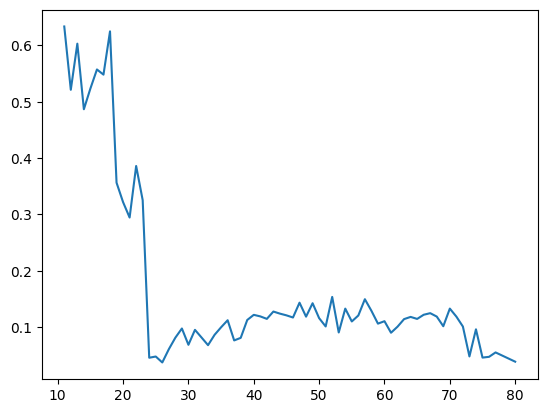

In [216]:
plt.plot(gr['age'], gr['discount_ratio'])

In [217]:
gr['catalogue_ratio'] = gr['catalogue_purchases_count_avg']/(gr['store_purchases_count_avg'] + gr['website_purchases_count_avg'] + gr['mobile_purchases_count_avg'])

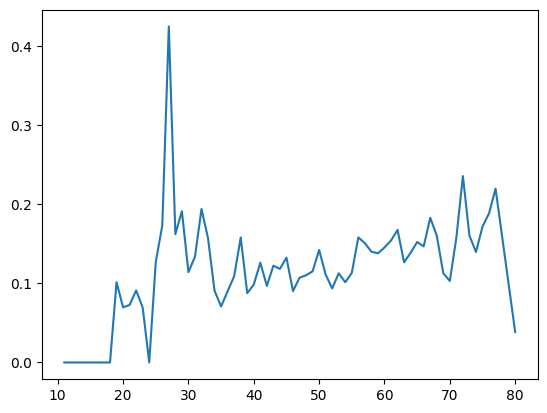

In [218]:
plt.plot(gr['age'], gr['catalogue_ratio'])

In [219]:
merged

,userId,complain_count,last_order_dt,discount_purchases_count_avg,catalogue_purchases_count_avg,store_purchases_count_avg,website_purchases_count_avg,website_visit_count_avg,mobile_purchases_count_avg,mobile_visit_count_avg,...,masters,phd,basic,year,month,day,last_order_month,registration_month,discount_share,discount_ratio
0,fa432faf-93f6-4dbf-ae14-8a8b681a106f,0,2024-06-22,2,0,4,3,7,18,33,...,0,0,0,2023,07,04,2024-06,2023-07,0.080000,0.080000
1,191455cb-b4cc-4ef4-abf6-056349caf299,2,2024-05-27,2,2,8,6,6,1,1,...,0,1,0,2023,01,20,2024-05,2023-01,0.133333,0.133333
2,e0037cb7-8e9a-4adf-b03a-ea8d9bcb67e9,0,2024-06-03,5,0,2,1,0,4,41,...,1,0,0,2023,03,06,2024-06,2023-03,0.714286,0.714286
3,00c8adb8-4694-4137-a352-404bd16cd299,0,2024-07-02,0,0,2,0,4,0,39,...,0,0,1,2024,01,21,2024-07,2024-01,0.000000,0.000000
4,38c84b62-8717-4918-bb1a-53957d14ca81,0,2024-05-25,2,0,3,2,8,9,16,...,0,0,0,2022,07,31,2024-05,2022-07,0.142857,0.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3016,7dd9469d-c2a3-4649-bb31-fdce0715e1a9,2,2024-07-08,4,5,13,4,2,21,38,...,0,0,0,2023,09,10,2024-07,2023-09,0.105263,0.105263
3017,21210d57-efad-46cc-82d8-4efc2475b681,2,2024-07-04,1,9,6,5,2,3,5,...,0,1,0,2023,09,27,2024-07,2023-09,0.071429,0.071429
3018,010fe525-912c-4b69-8eca-2e9c719c1f97,1,2024-07-02,0,0,1,1,3,2,24,...,0,0,1,2023,11,17,2024-07,2023-11,0.000000,0.000000
3019,c29d31be-8100-40e2-b547-b925da7d9a5c,0,2024-07-04,1,0,2,1,7,4,7,...,1,0,0,2023,08,06,2024-07,2023-08,0.142857,0.142857


In [222]:
bill = order_data.groupby('userId').sum().reset_index()
bill

/var/folders/2j/3ct3s54n3jxgmw9x4pcykxvw0000gn/T/ipykernel_10362/967743085.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bill = order_data.groupby('userId').sum().reset_index()


,userId,avg_bill
0,0017f690-7fcd-46c0-a058-de52c7836335,871.0
1,001b4dc7-b42b-462b-b596-a1f2f5febe42,1730.0
2,00323e9c-345c-4917-992a-96f6c1effc5f,3806.0
3,00367b3d-ab5f-4fbf-a23a-20cba62c7912,3358.0
4,0037779c-792a-4407-bd64-7d2e9375a117,4064.0
...,...,...
3400,ffdce3ed-108d-4628-ab86-f53efcf0fec4,1511.0
3401,ffdf9850-5bb1-4f05-9c1c-cb8edd4bcfe9,5151.0
3402,ffec5938-8d42-441d-93d7-e293acb0a01c,1921.0
3403,fff5de1d-0d9e-4004-b0cc-05010195fea9,4911.0


In [225]:
new_merged = pd.merge(merged, bill, on = 'userId')
new_merged

,userId,complain_count,last_order_dt,discount_purchases_count_avg,catalogue_purchases_count_avg,store_purchases_count_avg,website_purchases_count_avg,website_visit_count_avg,mobile_purchases_count_avg,mobile_visit_count_avg,...,phd,basic,year,month,day,last_order_month,registration_month,discount_share,discount_ratio,avg_bill
0,fa432faf-93f6-4dbf-ae14-8a8b681a106f,0,2024-06-22,2,0,4,3,7,18,33,...,0,0,2023,07,04,2024-06,2023-07,0.080000,0.080000,2592.0
1,191455cb-b4cc-4ef4-abf6-056349caf299,2,2024-05-27,2,2,8,6,6,1,1,...,1,0,2023,01,20,2024-05,2023-01,0.133333,0.133333,1780.0
2,e0037cb7-8e9a-4adf-b03a-ea8d9bcb67e9,0,2024-06-03,5,0,2,1,0,4,41,...,0,0,2023,03,06,2024-06,2023-03,0.714286,0.714286,1667.0
3,00c8adb8-4694-4137-a352-404bd16cd299,0,2024-07-02,0,0,2,0,4,0,39,...,0,1,2024,01,21,2024-07,2024-01,0.000000,0.000000,1704.0
4,38c84b62-8717-4918-bb1a-53957d14ca81,0,2024-05-25,2,0,3,2,8,9,16,...,0,0,2022,07,31,2024-05,2022-07,0.142857,0.142857,1485.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2756,7dd9469d-c2a3-4649-bb31-fdce0715e1a9,2,2024-07-08,4,5,13,4,2,21,38,...,0,0,2023,09,10,2024-07,2023-09,0.105263,0.105263,4647.0
2757,21210d57-efad-46cc-82d8-4efc2475b681,2,2024-07-04,1,9,6,5,2,3,5,...,1,0,2023,09,27,2024-07,2023-09,0.071429,0.071429,5154.0
2758,010fe525-912c-4b69-8eca-2e9c719c1f97,1,2024-07-02,0,0,1,1,3,2,24,...,0,1,2023,11,17,2024-07,2023-11,0.000000,0.000000,851.0
2759,c29d31be-8100-40e2-b547-b925da7d9a5c,0,2024-07-04,1,0,2,1,7,4,7,...,0,0,2023,08,06,2024-07,2023-08,0.142857,0.142857,30.0


In [227]:
new_merged['real_check'] = new_merged['avg_bill']/(new_merged['store_purchases_count_avg'] + new_merged['website_purchases_count_avg']+ new_merged['mobile_purchases_count_avg'])

In [228]:
new_merged

,userId,complain_count,last_order_dt,discount_purchases_count_avg,catalogue_purchases_count_avg,store_purchases_count_avg,website_purchases_count_avg,website_visit_count_avg,mobile_purchases_count_avg,mobile_visit_count_avg,...,basic,year,month,day,last_order_month,registration_month,discount_share,discount_ratio,avg_bill,real_check
0,fa432faf-93f6-4dbf-ae14-8a8b681a106f,0,2024-06-22,2,0,4,3,7,18,33,...,0,2023,07,04,2024-06,2023-07,0.080000,0.080000,2592.0,103.680000
1,191455cb-b4cc-4ef4-abf6-056349caf299,2,2024-05-27,2,2,8,6,6,1,1,...,0,2023,01,20,2024-05,2023-01,0.133333,0.133333,1780.0,118.666667
2,e0037cb7-8e9a-4adf-b03a-ea8d9bcb67e9,0,2024-06-03,5,0,2,1,0,4,41,...,0,2023,03,06,2024-06,2023-03,0.714286,0.714286,1667.0,238.142857
3,00c8adb8-4694-4137-a352-404bd16cd299,0,2024-07-02,0,0,2,0,4,0,39,...,1,2024,01,21,2024-07,2024-01,0.000000,0.000000,1704.0,852.000000
4,38c84b62-8717-4918-bb1a-53957d14ca81,0,2024-05-25,2,0,3,2,8,9,16,...,0,2022,07,31,2024-05,2022-07,0.142857,0.142857,1485.0,106.071429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2756,7dd9469d-c2a3-4649-bb31-fdce0715e1a9,2,2024-07-08,4,5,13,4,2,21,38,...,0,2023,09,10,2024-07,2023-09,0.105263,0.105263,4647.0,122.289474
2757,21210d57-efad-46cc-82d8-4efc2475b681,2,2024-07-04,1,9,6,5,2,3,5,...,0,2023,09,27,2024-07,2023-09,0.071429,0.071429,5154.0,368.142857
2758,010fe525-912c-4b69-8eca-2e9c719c1f97,1,2024-07-02,0,0,1,1,3,2,24,...,1,2023,11,17,2024-07,2023-11,0.000000,0.000000,851.0,212.750000
2759,c29d31be-8100-40e2-b547-b925da7d9a5c,0,2024-07-04,1,0,2,1,7,4,7,...,0,2023,08,06,2024-07,2023-08,0.142857,0.142857,30.0,4.285714


In [238]:
merged[merged['last_order_month'] < merged['registration_month']]

,userId,complain_count,last_order_dt,discount_purchases_count_avg,catalogue_purchases_count_avg,store_purchases_count_avg,website_purchases_count_avg,website_visit_count_avg,mobile_purchases_count_avg,mobile_visit_count_avg,...,masters,phd,basic,year,month,day,last_order_month,registration_month,discount_share,discount_ratio
762,78b1b1e7-0098-40e6-845c-026fea6cdb7d,0,2024-05-30,1,10,4,5,6,19,34,...,0,0,0,2024,06,02,2024-05,2024-06,0.035714,0.035714


In [241]:
c = merged.groupby('last_order_dt').count().reset_index()

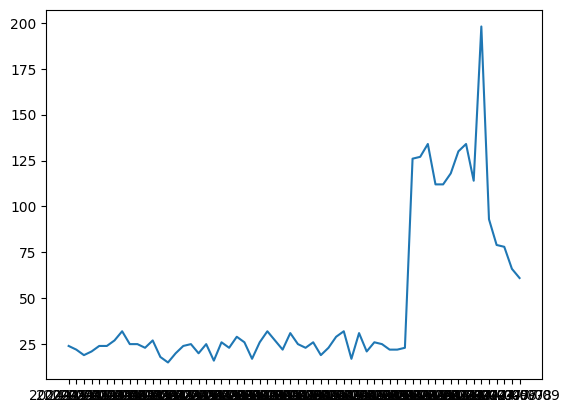

In [242]:
plt.plot(c['last_order_dt'], c['complain_count'])

In [243]:
c

,last_order_dt,userId,complain_count,discount_purchases_count_avg,catalogue_purchases_count_avg,store_purchases_count_avg,website_purchases_count_avg,website_visit_count_avg,mobile_purchases_count_avg,mobile_visit_count_avg,...,masters,phd,basic,year,month,day,last_order_month,registration_month,discount_share,discount_ratio
0,2024-05-11,24,24,24,24,24,24,24,24,24,...,24,24,24,24,24,24,24,24,24,24
1,2024-05-12,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
2,2024-05-13,19,19,19,19,19,19,19,19,19,...,19,19,19,19,19,19,19,19,19,19
3,2024-05-14,21,21,21,21,21,21,21,21,21,...,21,21,21,21,21,21,21,21,21,21
4,2024-05-15,24,24,24,24,24,24,24,24,24,...,24,24,24,24,24,24,24,24,24,24
5,2024-05-16,24,24,24,24,24,24,24,24,24,...,24,24,24,24,24,24,24,24,24,24
6,2024-05-17,27,27,27,27,27,27,27,27,27,...,27,27,27,27,27,27,27,27,27,27
7,2024-05-18,32,32,32,32,32,32,32,32,32,...,32,32,32,32,32,32,32,32,32,32
8,2024-05-19,25,25,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
9,2024-05-20,25,25,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25


In [313]:
churn = merged[(merged['last_order_dt'] >='2024-06-25') & (merged['last_order_dt'] <= '2024-07-04')]
remained = merged[merged['last_order_dt'] > '2024-07-04']

In [260]:
def churn(x):
    if (x >= '2024-06-25') and (x <='2024-07-04'):
        return 1
    else:
        return 0
def remained(x):
    if x > '2024-07-04':
        return 1
    else:
        return 0

In [263]:
merged['churn'] = merged['last_order_dt'].apply(churn)
merged['remained'] = merged['last_order_dt'].apply(remained)

In [282]:
res = smf.logit(formula = 'churn ~ income + kids + teenagers + ', data = merged).fit()

Optimization terminated successfully.
         Current function value: 0.690116
         Iterations 4


In [283]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                 2761
Model:                          Logit   Df Residuals:                     2757
Method:                           MLE   Df Model:                            3
Date:                Sat, 13 Jul 2024   Pseudo R-squ.:                0.002220
Time:                        16:48:54   Log-Likelihood:                -1905.4
converged:                       True   LL-Null:                       -1909.6
Covariance Type:            nonrobust   LLR p-value:                   0.03710
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2426      0.096     -2.518      0.012      -0.431      -0.054
income      3.158e-06   1.39e-06      2.275      0.023    4.37e-07    5.88e-06
kids          -0.0283      0.080     -0.356      0.722      -0.185       0.128
teenagers     -0.1825      0.080     -2.269      0.023      -0.340      -0.025
==============================================================================
"""

In [277]:
merged['reg_day'] = merged['join_datetime'].str.slice(0,10)
d = merged.groupby('reg_day').count().reset_index()
d.tail(10)

,reg_day,userId,complain_count,last_order_dt,discount_purchases_count_avg,catalogue_purchases_count_avg,store_purchases_count_avg,website_purchases_count_avg,website_visit_count_avg,mobile_purchases_count_avg,...,basic,year,month,day,last_order_month,registration_month,discount_share,discount_ratio,churn,remained
730,2024-05-27,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
731,2024-05-28,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
732,2024-05-29,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
733,2024-05-30,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
734,2024-05-31,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
735,2024-06-01,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
736,2024-06-02,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
737,2024-06-03,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
738,2024-06-04,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
739,2024-06-05,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5


In [287]:
new_merged['avg_bill']

0       2592.0
1       1780.0
2       1667.0
3       1704.0
4       1485.0
         ...  
2756    4647.0
2757    5154.0
2758     851.0
2759      30.0
2760     629.0
Name: avg_bill, Length: 2761, dtype: float64

In [289]:
merged['complain_count'].value_counts()

0    1637
1     703
2     409
8       3
6       2
3       2
4       2
5       2
7       1
Name: complain_count, dtype: int64

In [307]:
merged[merged['complain_count']>0].describe()

,complain_count,discount_purchases_count_avg,catalogue_purchases_count_avg,store_purchases_count_avg,website_purchases_count_avg,website_visit_count_avg,mobile_purchases_count_avg,mobile_visit_count_avg,marketing_company_outcome_1,marketing_company_outcome_2,...,dating,widow,bachelor,masters,phd,basic,discount_share,discount_ratio,churn,remained
count,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,...,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1120.000000,1120.000000,1124.000000,1124.000000
mean,1.412811,3.568505,2.134342,4.491993,3.365658,5.689502,10.959075,27.442171,0.220641,0.188612,...,0.156584,0.024021,0.507117,0.286477,0.145907,0.060498,inf,inf,0.467082,0.123665
std,0.672878,4.759181,2.828854,3.401708,2.793695,3.392496,10.903369,24.449582,0.414863,0.391374,...,0.363570,0.153184,0.500172,0.452316,0.353171,0.238514,NaN,NaN,0.499137,0.329346
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,2.000000,1.000000,3.000000,3.000000,12.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.062027,0.062027,0.000000,0.000000
50%,1.000000,2.000000,1.000000,4.000000,2.500000,6.000000,8.000000,22.500000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.142857,0.142857,0.000000,0.000000
75%,2.000000,4.000000,4.000000,6.000000,5.000000,7.000000,16.000000,34.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.377778,0.377778,1.000000,0.000000
max,8.000000,29.000000,28.000000,13.000000,25.000000,20.000000,59.000000,119.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,inf,inf,1.000000,1.000000


In [308]:
merged[merged['complain_count']==0].describe()

,complain_count,discount_purchases_count_avg,catalogue_purchases_count_avg,store_purchases_count_avg,website_purchases_count_avg,website_visit_count_avg,mobile_purchases_count_avg,mobile_visit_count_avg,marketing_company_outcome_1,marketing_company_outcome_2,...,dating,widow,bachelor,masters,phd,basic,discount_share,discount_ratio,churn,remained
count,1637.0,1637.000000,1637.000000,1637.000000,1637.000000,1637.000000,1637.000000,1637.000000,1637.000000,1637.000000,...,1637.000000,1637.000000,1637.000000,1637.000000,1637.000000,1637.000000,1636.000000,1636.000000,1637.000000,1637.000000
mean,0.0,3.519243,2.046426,4.541845,3.416005,5.708613,10.890654,26.631032,0.201588,0.185095,...,0.174710,0.021991,0.499084,0.289554,0.164325,0.047037,inf,inf,0.476481,0.145388
std,0.0,4.751183,2.558183,3.360600,2.740810,3.588218,11.076182,23.796010,0.401309,0.388493,...,0.379835,0.146700,0.500152,0.453694,0.370683,0.211783,NaN,NaN,0.499599,0.352599
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,1.000000,0.000000,2.000000,1.000000,3.000000,3.000000,11.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824,0.058824,0.000000,0.000000
50%,0.0,2.000000,1.000000,4.000000,3.000000,6.000000,8.000000,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.142857,0.000000,0.000000
75%,0.0,4.000000,4.000000,6.000000,5.000000,7.000000,16.000000,34.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.333333,0.333333,1.000000,0.000000
max,0.0,29.000000,11.000000,13.000000,11.000000,20.000000,59.000000,119.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,inf,inf,1.000000,1.000000


In [309]:
f = merged.groupby('last_order_dt').mean().reset_index()
f

/var/folders/2j/3ct3s54n3jxgmw9x4pcykxvw0000gn/T/ipykernel_10362/2909457763.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  f = merged.groupby('last_order_dt').mean().reset_index()


,last_order_dt,complain_count,discount_purchases_count_avg,catalogue_purchases_count_avg,store_purchases_count_avg,website_purchases_count_avg,website_visit_count_avg,mobile_purchases_count_avg,mobile_visit_count_avg,marketing_company_outcome_1,...,dating,widow,bachelor,masters,phd,basic,discount_share,discount_ratio,churn,remained
0,2024-05-11,0.500000,2.166667,1.083333,3.458333,2.333333,4.333333,6.916667,19.583333,0.250000,...,0.083333,0.041667,0.458333,0.416667,0.125000,0.000000,0.369913,0.369913,0.0,0.0
1,2024-05-12,0.318182,2.500000,1.909091,3.454545,3.272727,5.454545,7.681818,19.500000,0.227273,...,0.000000,0.045455,0.454545,0.318182,0.136364,0.090909,0.340912,0.340912,0.0,0.0
2,2024-05-13,1.000000,2.263158,1.578947,5.052632,3.105263,4.631579,9.578947,23.736842,0.263158,...,0.263158,0.052632,0.631579,0.105263,0.157895,0.105263,0.482784,0.482784,0.0,0.0
3,2024-05-14,0.571429,2.523810,1.619048,3.809524,3.000000,5.000000,9.142857,26.238095,0.285714,...,0.142857,0.000000,0.380952,0.428571,0.190476,0.000000,0.341213,0.341213,0.0,0.0
4,2024-05-15,0.333333,4.250000,2.125000,4.750000,3.541667,5.375000,12.166667,29.041667,0.125000,...,0.083333,0.000000,0.500000,0.333333,0.125000,0.041667,0.344232,0.344232,0.0,0.0
5,2024-05-16,0.541667,2.875000,1.875000,4.041667,2.791667,4.625000,11.916667,28.250000,0.208333,...,0.208333,0.000000,0.416667,0.333333,0.208333,0.041667,NaN,NaN,0.0,0.0
6,2024-05-17,0.703704,2.370370,1.814815,3.851852,2.370370,5.111111,8.555556,24.703704,0.185185,...,0.111111,0.037037,0.592593,0.222222,0.074074,0.111111,0.396582,0.396582,0.0,0.0
7,2024-05-18,0.562500,2.531250,2.218750,3.687500,2.843750,4.812500,6.406250,19.468750,0.218750,...,0.093750,0.000000,0.281250,0.406250,0.250000,0.062500,NaN,NaN,0.0,0.0
8,2024-05-19,0.760000,2.480000,1.840000,4.280000,2.760000,5.240000,8.400000,24.720000,0.200000,...,0.120000,0.040000,0.560000,0.320000,0.080000,0.040000,0.433590,0.433590,0.0,0.0
9,2024-05-20,0.520000,3.320000,1.960000,4.160000,3.440000,6.160000,10.960000,24.360000,0.240000,...,0.200000,0.040000,0.520000,0.320000,0.120000,0.040000,0.245217,0.245217,0.0,0.0


In [314]:
churn

,userId,complain_count,last_order_dt,discount_purchases_count_avg,catalogue_purchases_count_avg,store_purchases_count_avg,website_purchases_count_avg,website_visit_count_avg,mobile_purchases_count_avg,mobile_visit_count_avg,...,year,month,day,last_order_month,registration_month,discount_share,discount_ratio,churn,remained,reg_day
3,00c8adb8-4694-4137-a352-404bd16cd299,0,2024-07-02,0,0,2,0,4,0,39,...,2024,01,21,2024-07,2024-01,0.000000,0.000000,1,0,2024-01-21
5,02448415-4639-4db9-a5f2-796e85fafc8e,2,2024-06-27,1,0,0,0,4,2,33,...,2022,09,04,2024-06,2022-09,0.500000,0.500000,1,0,2022-09-04
11,51065df7-a72d-4e01-810c-d930909ca382,0,2024-06-29,2,10,5,7,6,11,20,...,2022,12,04,2024-06,2022-12,0.086957,0.086957,1,0,2022-12-04
12,0b8cd65c-840c-4c22-85f7-ae6ff3f4d183,1,2024-06-27,2,1,8,8,6,20,36,...,2022,09,16,2024-06,2022-09,0.055556,0.055556,1,0,2022-09-16
15,0e4d7a7f-84a3-4341-9c5f-6eb400a5c010,0,2024-07-03,3,1,3,4,7,20,36,...,2022,07,02,2024-07,2022-07,0.111111,0.111111,1,0,2022-07-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3013,1f64c622-05ed-4523-a03d-8f1aae68486e,2,2024-06-28,7,5,4,8,14,56,116,...,2023,02,19,2024-06,2023-02,0.102941,0.102941,1,0,2023-02-19
3017,21210d57-efad-46cc-82d8-4efc2475b681,2,2024-07-04,1,9,6,5,2,3,5,...,2023,09,27,2024-07,2023-09,0.071429,0.071429,1,0,2023-09-27
3018,010fe525-912c-4b69-8eca-2e9c719c1f97,1,2024-07-02,0,0,1,1,3,2,24,...,2023,11,17,2024-07,2023-11,0.000000,0.000000,1,0,2023-11-17
3019,c29d31be-8100-40e2-b547-b925da7d9a5c,0,2024-07-04,1,0,2,1,7,4,7,...,2023,08,06,2024-07,2023-08,0.142857,0.142857,1,0,2023-08-06


(array([73., 38., 85., 35., 41., 54., 33., 73., 29.,  0.,  4.,  2.,  5.,
        17.,  7., 22., 17.,  9., 33., 14., 15., 39., 22., 42., 35., 27.,
        58., 36., 59., 16., 22., 50., 14., 14., 28., 10., 30., 14., 23.,
        40., 16., 24., 31., 12., 15.,  9.,  5.,  7.,  0.,  1.]),
 array([11.  , 12.38, 13.76, 15.14, 16.52, 17.9 , 19.28, 20.66, 22.04,
        23.42, 24.8 , 26.18, 27.56, 28.94, 30.32, 31.7 , 33.08, 34.46,
        35.84, 37.22, 38.6 , 39.98, 41.36, 42.74, 44.12, 45.5 , 46.88,
        48.26, 49.64, 51.02, 52.4 , 53.78, 55.16, 56.54, 57.92, 59.3 ,
        60.68, 62.06, 63.44, 64.82, 66.2 , 67.58, 68.96, 70.34, 71.72,
        73.1 , 74.48, 75.86, 77.24, 78.62, 80.  ]),
 <BarContainer object of 50 artists>)

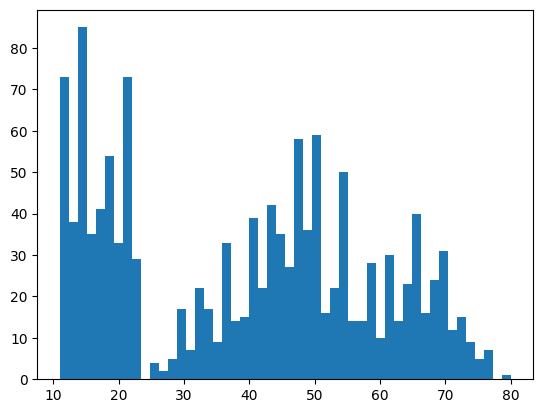

In [316]:
plt.hist(churn['age'], bins = 50)

In [320]:
target_audience = merged[(merged['age'] >= 18) & (merged['age'] <= 23)]

In [323]:
target_audience['userId']

9       be576e3b-7412-49fe-bf2c-da7223a33606
22      f6e58504-f118-441d-aacc-e29fa3976db8
26      a07b9dd5-968b-411d-baa5-d90cddc2b3b5
37      96d5848e-4388-4b1e-b867-53a113e44864
39      53eafd05-3888-4b03-ad74-bb79ded66141
                        ...                 
2985    3501fa4a-8c1c-4fbf-a0ba-b6744bd7f57d
2999    70396e66-d559-426e-a279-d75fb4d31b28
3003    cc3007ca-1a28-4a76-926c-7b14b3431d75
3011    4ef50fac-1831-4473-8039-09f469ad83d3
3013    1f64c622-05ed-4523-a03d-8f1aae68486e
Name: userId, Length: 347, dtype: object

In [324]:
order_data

,userId,category,avg_bill
0,2c6336a2-852b-48af-9150-9b9030387f5d,fish,432.0
1,1085e67c-3c4e-4903-b3e9-16631132c655,other,620.0
2,99792dfd-8c62-4903-92b2-a83dfd392cb1,sweets,233.0
3,ad50b3da-da8d-4b35-92c3-79cf83c2250a,fish,594.0
4,a300c8a3-6280-4a59-8c89-be4212a4eb26,fruits,0.0
...,...,...,...
23830,b2fe4d90-5554-4273-8245-6555e7be1ce1,other,7.0
23831,a6b826f4-a5b3-47b7-ad47-e7a3aee228df,vegetables,0.0
23832,4c2661f2-dfaf-415c-b10b-d281bd0b481e,fruits,0.0
23833,74b3b32a-36a6-49c6-8ff0-3878fc2090ca,sweets,352.0


In [326]:
target_order = order_data[order_data['userId'].isin(target_audience['userId'])]
target_order

,userId,category,avg_bill
13,5b06eeec-ac6f-4615-b79a-3cf3bae654c3,fish,216.0
32,0511c65a-ee31-451e-99af-81f38bc8bb24,other,25.0
110,e76313ce-8ed4-41a2-9432-a2e57ff9732c,other,366.0
128,d8a51c24-3117-4286-a464-ab06a8ab6669,other,328.0
154,20ae7897-7d32-48d6-b746-547e0a05e460,alcohol,872.0
...,...,...,...
23769,85b6d118-b07b-4b14-b73f-40b2f747225b,vegetables,847.0
23778,1cc1c358-4d79-468c-90b8-980c15184791,fish,1339.0
23794,8c349a5b-491e-4b65-88d8-5fc8a0486133,sweets,191.0
23810,8fecb398-ccb9-4332-a157-504b43ba270e,fruits,1810.0


In [333]:
gr_target = target_order.groupby('category').mean().reset_index
gr_target

/var/folders/2j/3ct3s54n3jxgmw9x4pcykxvw0000gn/T/ipykernel_10362/3510891594.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gr_target = target_order.groupby('category').mean().reset_index


<bound method DataFrame.reset_index of                avg_bill
category               
alcohol      912.387833
fish         858.491525
fruits      1120.093897
meat          71.571429
other        319.815476
sweets       228.605187
vegetables   758.925072>

TypeError: 'method' object is not subscriptable

In [332]:
target_audience.describe()

,complain_count,discount_purchases_count_avg,catalogue_purchases_count_avg,store_purchases_count_avg,website_purchases_count_avg,website_visit_count_avg,mobile_purchases_count_avg,mobile_visit_count_avg,marketing_company_outcome_1,marketing_company_outcome_2,...,dating,widow,bachelor,masters,phd,basic,discount_share,discount_ratio,churn,remained
count,347.000000,347.000000,347.000000,347.00000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,...,347.0,347.0,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000
mean,0.585014,11.835735,2.659942,3.59366,3.821326,10.700288,27.083573,73.440922,0.481268,0.475504,...,0.0,0.0,0.576369,0.371758,0.017291,0.034582,0.515421,0.515421,0.544669,0.210375
std,0.805046,8.837917,2.470563,1.78279,2.959711,5.067986,19.092154,32.643084,0.500371,0.500121,...,0.0,0.0,0.494847,0.483972,0.130542,0.182983,0.572042,0.572042,0.498720,0.408163
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.000000,0.000000,3.00000,1.000000,7.000000,9.000000,61.500000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.179450,0.179450,0.000000,0.000000
50%,0.000000,10.000000,2.000000,4.00000,3.000000,11.000000,28.000000,79.000000,0.000000,0.000000,...,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.388889,0.388889,1.000000,0.000000
75%,1.000000,19.000000,5.000000,5.00000,6.000000,15.000000,44.500000,99.000000,1.000000,1.000000,...,0.0,0.0,1.000000,1.000000,0.000000,0.000000,0.645752,0.645752,1.000000,0.000000
max,5.000000,29.000000,7.000000,6.00000,9.000000,19.000000,59.000000,119.000000,1.000000,1.000000,...,0.0,0.0,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,1.000000,1.000000


In [ ]:
мобильное приложение - 27.0
сайт - 3.8
очные магазины - 3.6

In [334]:
10.7/3.81

2.808398950131233

In [336]:
73.44/27.08

2.7119645494830134

In [340]:
target_audience['income'].describe()

count       347.000000
mean      58472.207493
std       19745.031727
min       25501.000000
25%       55604.500000
50%       65131.000000
75%       72398.500000
max      144902.000000
Name: income, dtype: float64

In [343]:
us = pd.read_csv('userdata-b66177fb-1f96-4dfd-9b28-15b118ef4551.csv')

In [344]:
len(merged)

2761

In [353]:
kids_merged

,userId,complain_count,last_order_dt,discount_purchases_count_avg,catalogue_purchases_count_avg,store_purchases_count_avg,website_purchases_count_avg,website_visit_count_avg,mobile_purchases_count_avg,mobile_visit_count_avg,...,year,month,day,last_order_month,registration_month,discount_share,discount_ratio,churn,remained,reg_day
2,e0037cb7-8e9a-4adf-b03a-ea8d9bcb67e9,0,2024-06-03,5,0,2,1,0,4,41,...,2023,03,06,2024-06,2023-03,0.714286,0.714286,0,0,2023-03-06
3,00c8adb8-4694-4137-a352-404bd16cd299,0,2024-07-02,0,0,2,0,4,0,39,...,2024,01,21,2024-07,2024-01,0.000000,0.000000,1,0,2024-01-21
5,02448415-4639-4db9-a5f2-796e85fafc8e,2,2024-06-27,1,0,0,0,4,2,33,...,2022,09,04,2024-06,2022-09,0.500000,0.500000,1,0,2022-09-04
6,19742c01-82da-4fe9-8770-131707627390,0,2024-05-17,1,0,1,0,4,0,41,...,2024,01,15,2024-05,2024-01,1.000000,1.000000,0,0,2024-01-15
21,747e4ba4-de36-4e9a-8d0f-3a71f21711dc,0,2024-07-06,3,0,1,0,0,5,48,...,2024,04,12,2024-07,2024-04,0.500000,0.500000,0,1,2024-04-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3005,94a2a7e4-c066-47d9-a8cc-533b5a301386,0,2024-06-29,2,0,1,0,7,4,3,...,2023,11,17,2024-06,2023-11,0.400000,0.400000,1,0,2023-11-17
3009,f58cad24-b095-47d4-a73b-f57f8ebc655a,1,2024-07-02,2,0,0,0,2,0,33,...,2024,01,11,2024-07,2024-01,inf,inf,1,0,2024-01-11
3010,36d3849d-bff6-4ae9-8f51-a0d7aa7b8983,0,2024-06-26,1,0,2,2,7,0,0,...,2022,09,22,2024-06,2022-09,0.250000,0.250000,1,0,2022-09-22
3018,010fe525-912c-4b69-8eca-2e9c719c1f97,1,2024-07-02,0,0,1,1,3,2,24,...,2023,11,17,2024-07,2023-11,0.000000,0.000000,1,0,2023-11-17


In [354]:
kids_merged['total'] = kids_merged['store_purchases_count_avg'] + kids_merged['website_purchases_count_avg'] + kids_merged['mobile_purchases_count_avg']

/var/folders/2j/3ct3s54n3jxgmw9x4pcykxvw0000gn/T/ipykernel_10362/4178988203.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kids_merged['total'] = kids_merged['store_purchases_count_avg'] + kids_merged['website_purchases_count_avg'] + kids_merged['mobile_purchases_count_avg']


In [355]:
kids_merged

,userId,complain_count,last_order_dt,discount_purchases_count_avg,catalogue_purchases_count_avg,store_purchases_count_avg,website_purchases_count_avg,website_visit_count_avg,mobile_purchases_count_avg,mobile_visit_count_avg,...,month,day,last_order_month,registration_month,discount_share,discount_ratio,churn,remained,reg_day,total
2,e0037cb7-8e9a-4adf-b03a-ea8d9bcb67e9,0,2024-06-03,5,0,2,1,0,4,41,...,03,06,2024-06,2023-03,0.714286,0.714286,0,0,2023-03-06,7
3,00c8adb8-4694-4137-a352-404bd16cd299,0,2024-07-02,0,0,2,0,4,0,39,...,01,21,2024-07,2024-01,0.000000,0.000000,1,0,2024-01-21,2
5,02448415-4639-4db9-a5f2-796e85fafc8e,2,2024-06-27,1,0,0,0,4,2,33,...,09,04,2024-06,2022-09,0.500000,0.500000,1,0,2022-09-04,2
6,19742c01-82da-4fe9-8770-131707627390,0,2024-05-17,1,0,1,0,4,0,41,...,01,15,2024-05,2024-01,1.000000,1.000000,0,0,2024-01-15,1
21,747e4ba4-de36-4e9a-8d0f-3a71f21711dc,0,2024-07-06,3,0,1,0,0,5,48,...,04,12,2024-07,2024-04,0.500000,0.500000,0,1,2024-04-12,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3005,94a2a7e4-c066-47d9-a8cc-533b5a301386,0,2024-06-29,2,0,1,0,7,4,3,...,11,17,2024-06,2023-11,0.400000,0.400000,1,0,2023-11-17,5
3009,f58cad24-b095-47d4-a73b-f57f8ebc655a,1,2024-07-02,2,0,0,0,2,0,33,...,01,11,2024-07,2024-01,inf,inf,1,0,2024-01-11,0
3010,36d3849d-bff6-4ae9-8f51-a0d7aa7b8983,0,2024-06-26,1,0,2,2,7,0,0,...,09,22,2024-06,2022-09,0.250000,0.250000,1,0,2022-09-22,4
3018,010fe525-912c-4b69-8eca-2e9c719c1f97,1,2024-07-02,0,0,1,1,3,2,24,...,11,17,2024-07,2023-11,0.000000,0.000000,1,0,2023-11-17,4


In [356]:
adult_merged['total'] = adult_merged['store_purchases_count_avg'] + adult_merged['website_purchases_count_avg'] + adult_merged['mobile_purchases_count_avg']

/var/folders/2j/3ct3s54n3jxgmw9x4pcykxvw0000gn/T/ipykernel_10362/206639915.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adult_merged['total'] = adult_merged['store_purchases_count_avg'] + adult_merged['website_purchases_count_avg'] + adult_merged['mobile_purchases_count_avg']


In [357]:
fail_merged['total'] = fail_merged['store_purchases_count_avg'] + fail_merged['website_purchases_count_avg'] + fail_merged['mobile_purchases_count_avg']

/var/folders/2j/3ct3s54n3jxgmw9x4pcykxvw0000gn/T/ipykernel_10362/3159617629.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fail_merged['total'] = fail_merged['store_purchases_count_avg'] + fail_merged['website_purchases_count_avg'] + fail_merged['mobile_purchases_count_avg']


In [358]:
else_merged['total'] = else_merged['store_purchases_count_avg'] + else_merged['website_purchases_count_avg'] + else_merged['mobile_purchases_count_avg']

/var/folders/2j/3ct3s54n3jxgmw9x4pcykxvw0000gn/T/ipykernel_10362/1005391252.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  else_merged['total'] = else_merged['store_purchases_count_avg'] + else_merged['website_purchases_count_avg'] + else_merged['mobile_purchases_count_avg']


In [359]:
from scipy import stats

In [366]:
stats.mannwhitneyu(kids_merged['total'], fail_merged['total'])

MannwhitneyuResult(statistic=489.5, pvalue=9.49408834495434e-29)

In [367]:
kids_merged['total'].mean()

4.411276948590381

In [368]:
adult_merged['total'].mean()

34.4985590778098

In [369]:
fail_merged['total'].mean()

20.148936170212767

In [370]:
else_merged['total'].mean()

20.650226757369616

In [371]:
df = pd.DataFrame({'Категория':['до 18 лет', '18-23 года', '24-30 лет', '30+ лет'], 'Среднее число заказов за месяц':[4.41, 34.50, 20.15, 20.65]})

In [372]:
df

,Категория,Среднее число заказов за месяц
0,до 18 лет,4.41
1,18-23 года,34.50
2,24-30 лет,20.15
3,30+ лет,20.65


<BarContainer object of 4 artists>

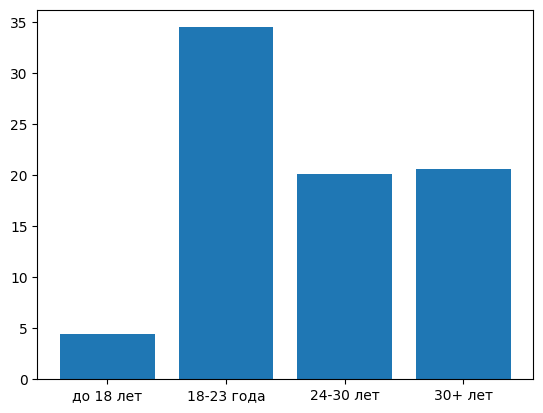

In [374]:
plt.bar(df['Категория'], df['Среднее число заказов за месяц'])

In [375]:
order_data

,userId,category,avg_bill
0,2c6336a2-852b-48af-9150-9b9030387f5d,fish,432.0
1,1085e67c-3c4e-4903-b3e9-16631132c655,other,620.0
2,99792dfd-8c62-4903-92b2-a83dfd392cb1,sweets,233.0
3,ad50b3da-da8d-4b35-92c3-79cf83c2250a,fish,594.0
4,a300c8a3-6280-4a59-8c89-be4212a4eb26,fruits,0.0
...,...,...,...
23830,b2fe4d90-5554-4273-8245-6555e7be1ce1,other,7.0
23831,a6b826f4-a5b3-47b7-ad47-e7a3aee228df,vegetables,0.0
23832,4c2661f2-dfaf-415c-b10b-d281bd0b481e,fruits,0.0
23833,74b3b32a-36a6-49c6-8ff0-3878fc2090ca,sweets,352.0


In [379]:
order_data[(order_data['category'] == 'meat') & (order_data['avg_bill'] >0)]

,userId,category,avg_bill
7,32fe3522-090a-4faa-b265-bc763142f0f5,meat,468.0
14,e71ee04d-5b6e-4e72-a7d8-10c974e59017,meat,126.0
16,9343e961-e58f-45a8-ae6b-b3117325ce5a,meat,585.0
22,ed797745-f475-449b-9f04-2fccee79cda4,meat,126.0
34,c1a49039-5fec-4152-a6b3-d6eef174d4fd,meat,81.0
...,...,...,...
23781,dc8eaa3a-0090-4a1c-8664-3e9f891f88b5,meat,336.0
23786,41819e86-5270-4401-bc29-ce97266e38fe,meat,537.0
23797,04b9ecff-3b5e-4c46-b8e3-92099caa4f1e,meat,144.0
23823,124459f3-f2bc-4065-b17b-2e39a998c545,meat,411.0


In [381]:
order_data.groupby('userId').sum()

,userId,category,avg_bill
0,2c6336a2-852b-48af-9150-9b9030387f5d,fish,432.0
1,1085e67c-3c4e-4903-b3e9-16631132c655,other,620.0
2,99792dfd-8c62-4903-92b2-a83dfd392cb1,sweets,233.0
3,ad50b3da-da8d-4b35-92c3-79cf83c2250a,fish,594.0
4,a300c8a3-6280-4a59-8c89-be4212a4eb26,fruits,0.0
...,...,...,...
23830,b2fe4d90-5554-4273-8245-6555e7be1ce1,other,7.0
23831,a6b826f4-a5b3-47b7-ad47-e7a3aee228df,vegetables,0.0
23832,4c2661f2-dfaf-415c-b10b-d281bd0b481e,fruits,0.0
23833,74b3b32a-36a6-49c6-8ff0-3878fc2090ca,sweets,352.0


In [382]:
merged

,userId,complain_count,last_order_dt,discount_purchases_count_avg,catalogue_purchases_count_avg,store_purchases_count_avg,website_purchases_count_avg,website_visit_count_avg,mobile_purchases_count_avg,mobile_visit_count_avg,...,year,month,day,last_order_month,registration_month,discount_share,discount_ratio,churn,remained,reg_day
0,fa432faf-93f6-4dbf-ae14-8a8b681a106f,0,2024-06-22,2,0,4,3,7,18,33,...,2023,07,04,2024-06,2023-07,0.080000,0.080000,0,0,2023-07-04
1,191455cb-b4cc-4ef4-abf6-056349caf299,2,2024-05-27,2,2,8,6,6,1,1,...,2023,01,20,2024-05,2023-01,0.133333,0.133333,0,0,2023-01-20
2,e0037cb7-8e9a-4adf-b03a-ea8d9bcb67e9,0,2024-06-03,5,0,2,1,0,4,41,...,2023,03,06,2024-06,2023-03,0.714286,0.714286,0,0,2023-03-06
3,00c8adb8-4694-4137-a352-404bd16cd299,0,2024-07-02,0,0,2,0,4,0,39,...,2024,01,21,2024-07,2024-01,0.000000,0.000000,1,0,2024-01-21
4,38c84b62-8717-4918-bb1a-53957d14ca81,0,2024-05-25,2,0,3,2,8,9,16,...,2022,07,31,2024-05,2022-07,0.142857,0.142857,0,0,2022-07-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3016,7dd9469d-c2a3-4649-bb31-fdce0715e1a9,2,2024-07-08,4,5,13,4,2,21,38,...,2023,09,10,2024-07,2023-09,0.105263,0.105263,0,1,2023-09-10
3017,21210d57-efad-46cc-82d8-4efc2475b681,2,2024-07-04,1,9,6,5,2,3,5,...,2023,09,27,2024-07,2023-09,0.071429,0.071429,1,0,2023-09-27
3018,010fe525-912c-4b69-8eca-2e9c719c1f97,1,2024-07-02,0,0,1,1,3,2,24,...,2023,11,17,2024-07,2023-11,0.000000,0.000000,1,0,2023-11-17
3019,c29d31be-8100-40e2-b547-b925da7d9a5c,0,2024-07-04,1,0,2,1,7,4,7,...,2023,08,06,2024-07,2023-08,0.142857,0.142857,1,0,2023-08-06


In [383]:
merged[merged['store_purchases_count_avg'] > 0]

,userId,complain_count,last_order_dt,discount_purchases_count_avg,catalogue_purchases_count_avg,store_purchases_count_avg,website_purchases_count_avg,website_visit_count_avg,mobile_purchases_count_avg,mobile_visit_count_avg,...,year,month,day,last_order_month,registration_month,discount_share,discount_ratio,churn,remained,reg_day
0,fa432faf-93f6-4dbf-ae14-8a8b681a106f,0,2024-06-22,2,0,4,3,7,18,33,...,2023,07,04,2024-06,2023-07,0.080000,0.080000,0,0,2023-07-04
1,191455cb-b4cc-4ef4-abf6-056349caf299,2,2024-05-27,2,2,8,6,6,1,1,...,2023,01,20,2024-05,2023-01,0.133333,0.133333,0,0,2023-01-20
2,e0037cb7-8e9a-4adf-b03a-ea8d9bcb67e9,0,2024-06-03,5,0,2,1,0,4,41,...,2023,03,06,2024-06,2023-03,0.714286,0.714286,0,0,2023-03-06
3,00c8adb8-4694-4137-a352-404bd16cd299,0,2024-07-02,0,0,2,0,4,0,39,...,2024,01,21,2024-07,2024-01,0.000000,0.000000,1,0,2024-01-21
4,38c84b62-8717-4918-bb1a-53957d14ca81,0,2024-05-25,2,0,3,2,8,9,16,...,2022,07,31,2024-05,2022-07,0.142857,0.142857,0,0,2022-07-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3016,7dd9469d-c2a3-4649-bb31-fdce0715e1a9,2,2024-07-08,4,5,13,4,2,21,38,...,2023,09,10,2024-07,2023-09,0.105263,0.105263,0,1,2023-09-10
3017,21210d57-efad-46cc-82d8-4efc2475b681,2,2024-07-04,1,9,6,5,2,3,5,...,2023,09,27,2024-07,2023-09,0.071429,0.071429,1,0,2023-09-27
3018,010fe525-912c-4b69-8eca-2e9c719c1f97,1,2024-07-02,0,0,1,1,3,2,24,...,2023,11,17,2024-07,2023-11,0.000000,0.000000,1,0,2023-11-17
3019,c29d31be-8100-40e2-b547-b925da7d9a5c,0,2024-07-04,1,0,2,1,7,4,7,...,2023,08,06,2024-07,2023-08,0.142857,0.142857,1,0,2023-08-06


In [386]:
merged['offline_share'] = merged['store_purchases_count_avg']/(merged['store_purchases_count_avg'] +  merged['website_purchases_count_avg'] + merged['mobile_purchases_count_avg'])

In [391]:
merged = merged.dropna(subset = ['offline_share'])

{'whiskers': [<matplotlib.lines.Line2D at 0x287914d10>,
 'caps': [<matplotlib.lines.Line2D at 0x287916150>,
 'boxes': [<matplotlib.lines.Line2D at 0x2879142d0>],
 'medians': [<matplotlib.lines.Line2D at 0x287917310>],
 'fliers': [<matplotlib.lines.Line2D at 0x287915e90>],
 'means': []}

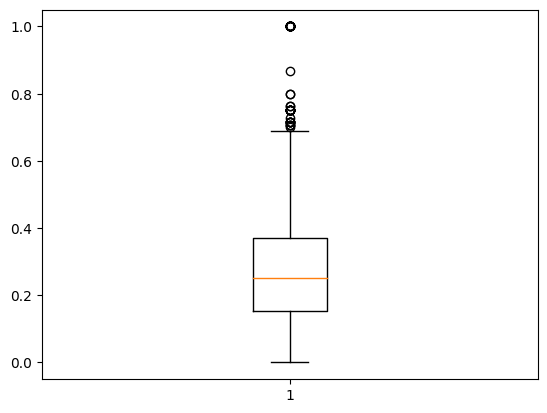

In [392]:
plt.boxplot(merged['offline_share'])

In [398]:
merged[merged['offline_share'] >= 0.5]

,userId,complain_count,last_order_dt,discount_purchases_count_avg,catalogue_purchases_count_avg,store_purchases_count_avg,website_purchases_count_avg,website_visit_count_avg,mobile_purchases_count_avg,mobile_visit_count_avg,...,month,day,last_order_month,registration_month,discount_share,discount_ratio,churn,remained,reg_day,offline_share
1,191455cb-b4cc-4ef4-abf6-056349caf299,2,2024-05-27,2,2,8,6,6,1,1,...,01,20,2024-05,2023-01,0.133333,0.133333,0,0,2023-01-20,0.533333
3,00c8adb8-4694-4137-a352-404bd16cd299,0,2024-07-02,0,0,2,0,4,0,39,...,01,21,2024-07,2024-01,0.000000,0.000000,1,0,2024-01-21,1.000000
6,19742c01-82da-4fe9-8770-131707627390,0,2024-05-17,1,0,1,0,4,0,41,...,01,15,2024-05,2024-01,1.000000,1.000000,0,0,2024-01-15,1.000000
8,fbf550fd-58e4-44d4-9c6c-214a18a64349,0,2024-06-04,4,0,4,2,5,2,3,...,07,03,2024-06,2022-07,0.500000,0.500000,0,0,2022-07-03,0.500000
23,9efe4853-651b-42fd-8d23-dcba9a80a4cf,2,2024-07-01,5,0,2,1,1,0,5,...,05,30,2024-07,2023-05,1.666667,1.666667,1,0,2023-05-30,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2987,14fb2783-696e-4321-91d8-1fc5d6d03bed,1,2024-06-14,1,10,13,3,1,1,1,...,07,27,2024-06,2022-07,0.058824,0.058824,0,0,2022-07-27,0.764706
2997,51226841-1706-4960-b6fd-8e14a8a521fc,0,2024-06-27,2,2,11,4,2,1,1,...,05,30,2024-06,2024-05,0.125000,0.125000,1,0,2024-05-30,0.687500
2999,70396e66-d559-426e-a279-d75fb4d31b28,1,2024-07-08,2,0,2,0,5,2,23,...,01,23,2024-07,2024-01,0.500000,0.500000,0,1,2024-01-23,0.500000
3006,660bdfb7-14e2-4e60-885b-e7bf48a555cf,2,2024-07-08,0,8,13,6,2,1,1,...,05,16,2024-07,2023-05,0.000000,0.000000,0,1,2023-05-16,0.650000
